# Data Science ODL Project: Assessment 2

ID: 201664649 (od21ss@leeds.ac.uk)

## Case study

This data science project studies the steel annealing data provided by industry and builds a data analysis model which can be used to predict the annealing classes effectively.

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives


This project aims to develop a highly accurate data analysis model that can predict different annealing classes when provided with the annealing process data. Primarily, two distinct machine learning models will be built and evaluated to obtain the best classification model.

The most compelling objectives of this project are as follows:
* _To explore the dataset to understand the nuances of the case study._
* _To preprocess the dataset for handling missing and duplicate data, dealing with categorical attributes, scaling and discretizing the continuous attributes, etc._
* _To find machine learning models for classifying the dataset accurately._
* _To train and optimize multiple classification models using the preprocessed data._
* _To analyze and evaluate the trained models’ performances._
* _To choose the best model based on the test performances._







###  b) Plan


A Gantt chart presents the timeline of the project in the Figure 1. As it can be seen in the Gantt chart, after understanding the case study and preprocessing the data, two models are implemented, namely, Model 1, the Ensemble Model, and Model 2, the Multilayer Perceptron Model. To note, the Ensemble contains three different base models, namely, K-Nearest Neighbour, Naive Bayes and Decision Tree Model, respectively. All the models implemented in this project are described in-depth in the _Technique_ sections. After the models are developed, they are trained using the preprocessed training data and their hyperparameters are tuned by sklearn's _grid search_ method. Furthermore, cross-validation and testing of the models are carried out for performance analysis of the models and for selecting the best model.  

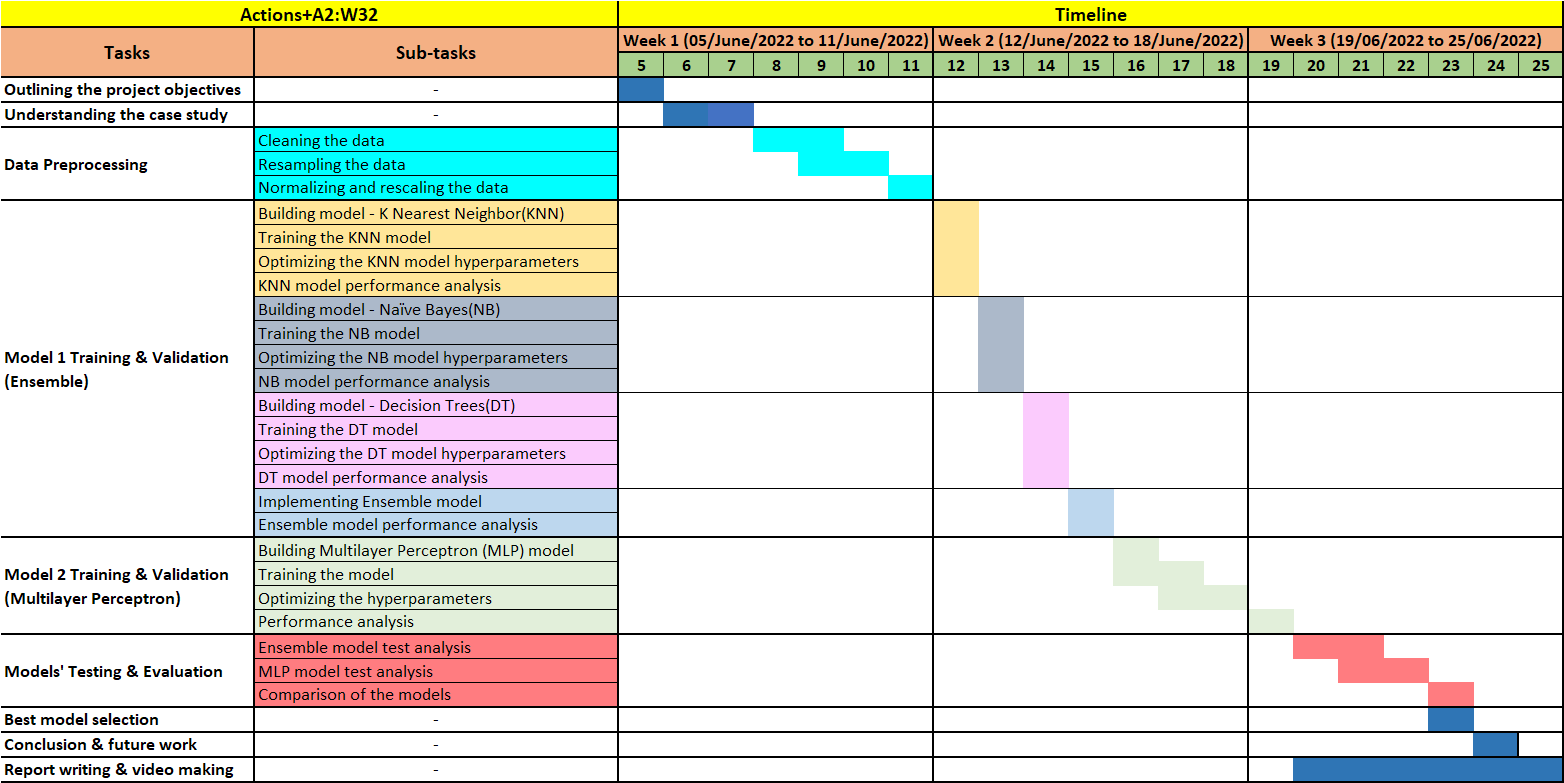
*Figure 1: Gantt Chart - Project Plan*

## 2. Understanding the case study (4 marks)

###  Case study analysis

The case study revolves around exploring a dataset containing data generated during steel annealing processes and needs to find an appropriate classification model to classify the annealing classes in the industry. Three files are provided for this case study, two of which are actual data files in comma-separated value (csv) format, namely '_anneal.data_' used for training of the models and '_anneal.test_' for evaluating the models' performance and the last one is a metadata file, namely '_anneal.names_', which provides details about the attributes of the steal annealing data.

The critical points observed during the case study are as follows:

1. The dataset is imbalanced.
> The whole annealing data is classified among six annealing classes, namely, 1, 2, 3, 4, 5, and U, which can be found in the last column of the training dataset. It is evident from the pie chart in **[Figure 2](#Figure_2)** below that the highest number of data points are provided for class 3, and there is no data for class 4. Thus, the dataset is highly unbalanced and will be balanced by oversampling classes with fewer instances.

2. The dataset is scant.
> For our case, according to the metadata file, there are 798 instances and 38 attributes of data. However, only ten attributes among 38 contain less than 10% missing values. Thus, the case data includes a lot of missing entries. The missing data in the attribute columns are denoted by the '?' symbol. The data containing missing values will be dropped during preprocessing.

3. The classification model gets continuous data from the dataset.
> Some of the main attributes of the steel annealing classes like the _carbon_, _hardness_, _strength_, _thick_, _width_, and _len_ are all continuous data. As machine learning models can't be trained effectively with the continuous data, all the continuous attributes will be discretized using binning technique before the models’ training and validation.

4. The continuous data has a very high variance.
> Among the ten rich attributes, six are critical for classification as they hold continuous data which is spread over widely varying ranges. The variances of such attributes are presented in **[Table 1](#Table_1)**, summarizing the dataset. For example, attribute _len_ ranges between 0 and 4880, whereas feature _thick_ ranges between 0.25 and 4 only. The span of the latter is minimal compared to that of the former. Thus, scaling of the attributes will be carried out to reduce the variance of the data before training the models.

5. The dataset contains outliers and string values.
> The dataset contains a few outliers like zero _width_ and zero _len_ for SHEET-shape materials.  The outliers will be removed during preprocessing of the dataset. Additionally, many features contain string values that can't be given directly to the models while training. So, one hot encoding will be carried out to convert such features during the preprocessing step.

### Importing the libraries

In [ ]:
import pandas as pd     # Importing pandas for reading csv files and manipulating the data
import numpy as np      # Importing numpy for mathematical operations
import matplotlib.pyplot as plt # Importing matplotlib for plotting

#Importing sklearn modules of classifiers, scalers and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Reading the CSV files

The csv files are read and loaded into training and test dataframes without headers.

In [ ]:
DF_ANNEAL_TRAIN = pd.read_csv("anneal.data", header=None) 
DF_ANNEAL_TEST = pd.read_csv("anneal.test", header=None) 

### Exploring the training dateset

In [ ]:
DF_ANNEAL_TRAIN.shape

(798, 39)

In [ ]:
DF_ANNEAL_TRAIN.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       798 non-null    object 
 1   1       798 non-null    object 
 2   2       798 non-null    object 
 3   3       798 non-null    int64  
 4   4       798 non-null    int64  
 5   5       798 non-null    object 
 6   6       798 non-null    object 
 7   7       798 non-null    object 
 8   8       798 non-null    int64  
 9   9       798 non-null    object 
 10  10      798 non-null    object 
 11  11      798 non-null    object 
 12  12      798 non-null    object 
 13  13      798 non-null    object 
 14  14      798 non-null    object 
 15  15      798 non-null    object 
 16  16      798 non-null    object 
 17  17      798 non-null    object 
 18  18      798 non-null    object 
 19  19      798 non-null    object 
 20  20      798 non-null    object 
 21  21      798 non-null    object 
 22  22

From the above cell, we can see that the dataframe contains 32, 5, and 2 attributes of object, integer, and float datatypes, respectively. There are 798 instances of data in the training dataset. It is to be noted that all the fields are not null, i.e., each column has 798 entries of either valid data, or, missing value '?'.   

In [ ]:
DF_ANNEAL_TRAIN.head(10)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
5,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
6,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.699,610.0,4880,Y,0,?,3
7,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,3.300,152.0,0,?,0,?,3
8,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
9,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3


To get the count of instance data available for each classes in the training set.

In [ ]:
classes_count = DF_ANNEAL_TRAIN[38].value_counts(ascending=True)
classes_count

1      8
U     34
5     60
2     88
3    608
Name: 38, dtype: int64

Plotting a piechart <a name='Figure_2'></a> to show the percentage of data available in training dataset for each class.

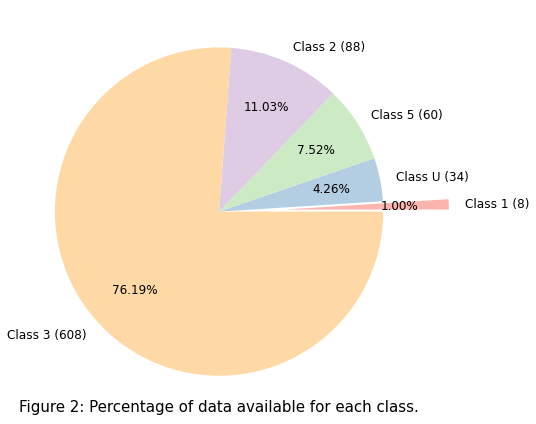

In [ ]:
classes_count.index = ['Class ' + index + ' (' + str(classes_count[index]) + ')' for index in classes_count.index]

figure_2, axs = plt.subplots(figsize=(7, 6))

axs.pie(classes_count,
        labels = classes_count.index,
        autopct='%.2f%%',
        pctdistance=0.7,
        colors = plt.cm.Pastel1.colors,
        explode = [0.4, 0, 0, 0, 0],
        textprops={'size': 'large'},
        counterclock=90)

axs.set_title("Figure 2: Percentage of data available for each class.", y=0, fontsize=15)

figure_2.tight_layout()
figure_2.show()

### Analyzing the numeric attributes of the dataset.
<a Name='Table_1'>*Table 1*</a>


In [ ]:
Table_1 = DF_ANNEAL_TRAIN.describe()
'''
Dataframe Column - Attribute Name
    3            - Carbon
    4            - Hardness
    8            - Strength
    32           - Thick
    33           - Width
    34           - Len
    36           - Bore
'''
Table_1

,3,4,8,32,33,34,36
count,798.000000,798.000000,798.00000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,30.85213,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,115.55127,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.00000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.00000,4.000000,1525.000000,4880.000000,600.000000


### A glimpse of test dataset

In [ ]:
DF_ANNEAL_TEST.shape    # Shape of the dataframe

(100, 39)

In [ ]:
DF_ANNEAL_TEST.info()   # Summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    object 
 1   1       100 non-null    object 
 2   2       100 non-null    object 
 3   3       100 non-null    int64  
 4   4       100 non-null    int64  
 5   5       100 non-null    object 
 6   6       100 non-null    object 
 7   7       100 non-null    object 
 8   8       100 non-null    int64  
 9   9       100 non-null    object 
 10  10      100 non-null    object 
 11  11      100 non-null    object 
 12  12      100 non-null    object 
 13  13      100 non-null    object 
 14  14      100 non-null    object 
 15  15      100 non-null    object 
 16  16      100 non-null    object 
 17  17      100 non-null    object 
 18  18      100 non-null    object 
 19  19      100 non-null    object 
 20  20      100 non-null    object 
 21  21      100 non-null    object 
 22  22 

In [ ]:
DF_ANNEAL_TEST.head(10) # First 10 rows of the dataframe

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
5,TN,C,?,0,0,?,A,1,0,?,...,?,?,COIL,0.800,50.0,0,?,0,?,5
6,?,C,?,0,0,?,?,?,500,?,...,?,?,SHEET,1.600,300.1,301,?,0,?,2
7,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.800,610.0,762,?,0,?,2
8,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,1.600,610.0,4170,?,0,?,3
9,ZS,C,A,0,0,?,S,5,0,N,...,?,?,SHEET,1.200,1250.0,762,?,0,?,3


## 3. Pre-processing applied (20 marks)

#### Defining the constants

In [ ]:
# List containing labels for the columns of the dataframe
FEATURES_LABEL_LIST = [
   'family',
   'product-type',
   'steel',
   'carbon',
   'hardness',
   'temper_rolling',
   'condition',
   'formability',
   'strength',
   'non-ageing',
   'surface-finish',
   'surface-quality',
   'enamelability',
   'bc',
   'bf',
   'bt',
   'bw/me',
   'bl',
   'm',
   'chrom',
   'phos',
   'cbond',
   'marvi',
   'exptl',
   'ferro',
   'corr',
   'blue/bright/varn/clean',
   'lustre',
   'jurofm',
   's',
   'p',
   'shape',
   'thick',
   'width',
   'len',
   'oil',
   'bore',
   'packing',
   'classes'
]

# Target attribute
TARGET_COLUMN = 'classes'

# List of continuous data columns
CONTINUOUS_COLS = ['thick','width','len']

# Missing value string
MISSING_VALUE = '?'

# Contant strings
TRAINING = 'training'
TESTING = 'testing'
SCALE = 'scale'
DISCRETIZE = 'discretize'

#### Setting the global variables


In [ ]:
# Global variable to store list of columns having single-valued data
GV_SINGLE_VALUED_COLS = []

# Global variable to store list of columns having missing-valued data
GV_MISSING_VALUED_COLS = []

# Global variable to store dictionary of columns and the bins
GV_DISCRETIZER_BINS_DICT = {}

# Global variable to store number of bins require for discretization
GV_DISCRETIZER_NUM_BINS = 10

# Global variable to store object of scaler class
GV_SCALER_OBJECT = StandardScaler(with_mean=False)      # with_mean is set to false to handle the sparse data appropriately.

# Global variable to store boolean true or false if training set is preprocessed
GV_TRAIN_DATA_PREPROCESSED = False

# Global variable to store previous scaling or discretization operation
GV_TRAIN_DATA_SCALED_OR_DISCRETIZED = None

###  a) Preparing the labels appropriately if necessary 

As the features are not named in the dataset provided, I have taken the names of the features from the _anneal.names_ file, and I have created  a constant list named *FEATURES_LABEL_LIST* to rename the columns of the dataframe for easy accessibility of the features.

Creating a function to add the features names to the dataframe.

In [ ]:
def add_df_column_names(dataframe, cols_name_list=FEATURES_LABEL_LIST):
    """
    This function adds the column names from a list to a dataframe
    and returns the dataframe.

    Parameters:
    ---------- 
    dataframe: Pandas dataframe
    cols_name_list: List of column names

    Returns:
    -------
    df: new dataframe or the existing if number of features are not matching number of
        column names provided.
    """
    print("Adding column names...")

    if len(dataframe.columns) == len(cols_name_list):
        df = dataframe.copy(deep=True)
        df.columns = cols_name_list
        print("Column names added to dataframe successfully")
        return df
    
    print("Number of columns in dataframe doesn't match the number of column names in the list.")
    return dataframe

In [ ]:
DF_TRAIN_PREPROCESS_COL_NAMES = add_df_column_names(DF_ANNEAL_TRAIN)
DF_TRAIN_PREPROCESS_COL_NAMES.head(10)

Adding column names...
Column names added to dataframe successfully


,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
5,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
6,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.699,610.0,4880,Y,0,?,3
7,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,3.300,152.0,0,?,0,?,3
8,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
9,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3


Creating a function to extract the features and the target into two separate dataframes. Features dataframe will act as '**X**' and target dataframe will act as '**y**' while training our model.

In [ ]:
def split_features_n_target_df(dataframe, target_col):
    """
    This function converts the target column into category datatype.

    Parameters:
    ---------- 
    dataframe: Pandas dataframe
    target_col: Target column name

    Returns:
    -------
    features_df, target_df: new dataframes
    """
    print("Splitting the dataframe into a features dataframe and a target dataframe...")
    target_df = dataframe[target_col]
    features_df = dataframe.drop(columns=[target_col])
    print("Splitted the dataframe successfully")
    return features_df, target_df

In [ ]:
DF_TRAIN_FEATURES, DF_TRAIN_TARGET = split_features_n_target_df(DF_TRAIN_PREPROCESS_COL_NAMES, TARGET_COLUMN)
DF_TRAIN_FEATURES.head(10)

Splitting the dataframe into a features dataframe and a target dataframe...
Splitted the dataframe successfully


,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,?,C,A,8,0,?,S,?,0,?,...,?,?,?,COIL,0.700,610.0,0,?,0,?
1,?,C,R,0,0,?,S,2,0,?,...,?,?,?,COIL,3.200,610.0,0,?,0,?
2,?,C,R,0,0,?,S,2,0,?,...,?,?,?,SHEET,0.700,1300.0,762,?,0,?
3,?,C,A,0,60,T,?,?,0,?,...,?,?,?,COIL,2.801,385.1,0,?,0,?
4,?,C,A,0,60,T,?,?,0,?,...,?,?,?,SHEET,0.801,255.0,269,?,0,?
5,?,C,A,0,45,?,S,?,0,?,...,?,?,?,COIL,1.600,610.0,0,?,0,?
6,?,C,R,0,0,?,S,2,0,?,...,?,?,?,SHEET,0.699,610.0,4880,Y,0,?
7,?,C,A,0,0,?,S,2,0,?,...,?,?,?,COIL,3.300,152.0,0,?,0,?
8,?,C,R,0,0,?,S,2,0,?,...,?,?,?,COIL,0.699,1320.0,0,?,0,?
9,?,C,A,0,0,?,S,3,0,N,...,?,?,?,SHEET,1.000,1320.0,762,?,0,?


In [ ]:
DF_TRAIN_TARGET.head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: classes, dtype: object

###  b) Removing synonymous and noisy attributes if necessary 


#### Dealing with outliers in the continuous data columns

To find the outliers in the columns _thick_, _width_ and _len_, I am plotting boxplots for these columns. Below code cell will generate the boxplots of three columns and plot them in **Figure 3**.

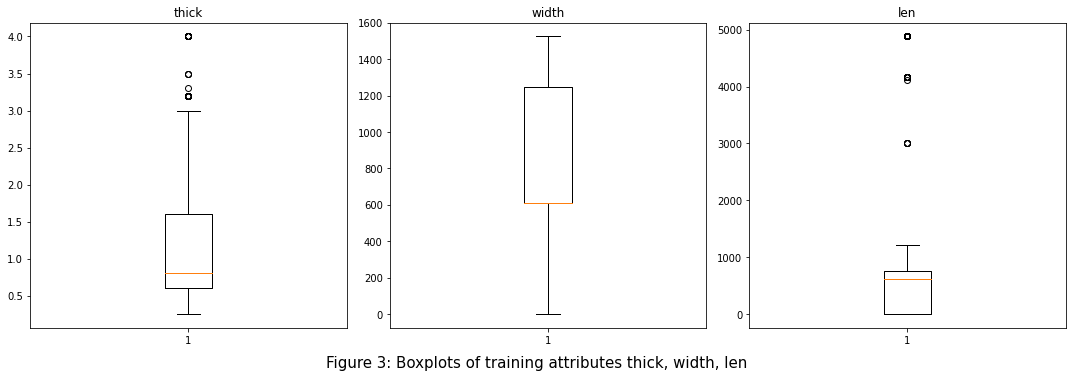

In [ ]:
figure_3, axs = plt.subplots(figsize=(15,5), ncols=3)
col = 0

for column in CONTINUOUS_COLS:
    axs[:][col].boxplot(DF_TRAIN_FEATURES[column])
    axs[:][col].set_title(column)
    col += 1

figure_3.suptitle("Figure 3: Boxplots of training attributes thick, width, len",fontsize=15, y=0)
figure_3.tight_layout()
figure_3.show()

For the columns _thick_ and _len_, outliers are observed and they are shown as circles beyond the whiskers.

Creating a function to calculate the upper and lower whiskers of a column data for detecting outliers.

In [ ]:
def get_upper_n_lower_limit_whiskers(arr):
    """
    This function returns upper and lower limit to identify the outliers.

    Parameters:
    ---------- 
    arr: Array of numbers

    Returns:
    -------
    upper_limit, lower_limit: Float values
    """
    # Get 1st quartile of an array
    q1 = np.quantile(arr, 0.25)

    # Get 3rd quartile of an array
    q3 = np.quantile(arr, 0.75)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower limit
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    return upper_limit, lower_limit

Creating a function to fix the outlier values in the continuous data columns of the dataframe. This function will internally call a function get_upper_n_lower_limit_whiskers() to get whiskers of each continuous data columns provided in a list.

In [ ]:
def fixing_continuous_cols_outliers(inp_df, columns=CONTINUOUS_COLS):
    """
    This function fixes outlier by replacing it with either upper limit or
    lower limit.

    Parameters:
    ---------- 
    inp_df: Pandas dataframe
    columns: Continuous data columns list. Default is CONTINUOUS_COLS

    Returns:
    -------
    df: new dataframe
    """
    df = inp_df.copy(deep=True)

    for column in columns:
        upper_limit, lower_limit = get_upper_n_lower_limit_whiskers(df[column])
        
        # Check and update the data if it is less than lower limit
        df[column].where(lower_limit <= df[column], lower_limit, inplace=True)

        # Check and update the data if it is greater than upper limit
        df[column].where(upper_limit >= df[column], upper_limit, inplace=True)

    return df

In [ ]:
DF_TRAIN_FEATURES[CONTINUOUS_COLS].describe()   # Summary of continuous columns with outliers

,thick,width,len
count,798.000000,798.000000,798.000000
mean,1.181847,781.744361,1273.037594
std,0.861608,404.722346,1886.768139
min,0.250000,0.000000,0.000000
25%,0.601000,609.900000,0.000000
50%,0.800000,610.000000,611.000000
75%,1.600000,1250.000000,762.000000
max,4.000000,1525.000000,4880.000000


In [ ]:
DF_TRAIN_OUTLIERS_FIXED = fixing_continuous_cols_outliers(DF_TRAIN_FEATURES)
DF_TRAIN_OUTLIERS_FIXED[CONTINUOUS_COLS].describe() # Summary of continuous columns after fixing outliers

,thick,width,len
count,798.000000,798.000000,798.000000
mean,1.159268,781.744361,643.357143
std,0.800975,404.722346,749.603834
min,0.250000,0.000000,0.000000
25%,0.601000,609.900000,0.000000
50%,0.800000,610.000000,611.000000
75%,1.600000,1250.000000,762.000000
max,3.098500,1525.000000,1905.000000


The max values of the columns _thick_ and _len_ indicates that their outliers are replaced with their corresponding upper whisker values. Figure 4 also shows that the columns _thick_, _width_, and _len_ are outlier free.

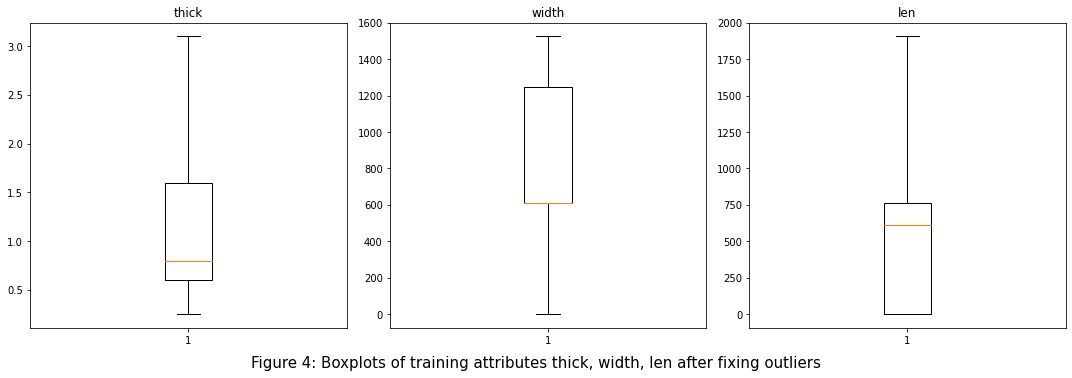

In [ ]:
figure_4, axs = plt.subplots(figsize=(15,5), ncols=3)
col = 0
for column in CONTINUOUS_COLS:
    axs[:][col].boxplot(DF_TRAIN_OUTLIERS_FIXED[column])
    axs[:][col].set_title(column)
    col += 1

figure_4.suptitle("Figure 4: Boxplots of training attributes thick, width, len after fixing outliers",fontsize=15, y=0)
figure_4.tight_layout()
figure_4.show()

#### Dealing with duplicate data

As duplicates in training data does not provide any value addition during model training, I am dropping duplicate instances from the dataframe. The following code cell shows duplicates in the training dataset.


In [ ]:
DF_TRAIN_PREPROCESS_COL_NAMES[DF_TRAIN_PREPROCESS_COL_NAMES.duplicated(keep=False) == True]

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
9,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3
57,?,C,A,0,0,?,?,?,500,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
146,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,881,?,0,?,2
178,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
193,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
203,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
214,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,0.700,1320.0,0,?,0,?,3
239,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
420,?,C,A,0,0,?,?,?,500,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
452,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3


In [ ]:
DF_TRAIN_PREPROCESS_COL_NAMES[DF_TRAIN_PREPROCESS_COL_NAMES.duplicated() == True]

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
203,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
239,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
420,?,C,A,0,0,?,?,?,500,?,...,?,?,COIL,1.600,1320.0,0,?,0,?,3
452,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3
477,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,0.700,1320.0,0,?,0,?,3
637,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,881,?,0,?,2
716,ZS,C,R,0,0,?,A,2,0,?,...,?,?,COIL,0.699,609.9,0,?,0,?,3
718,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,0.700,1320.0,0,?,0,?,3


There are 15 duplicate instances in the training dataset and 8 among them are unique as seen in the above cells.

Creating a function to drop columns with duplicate data.

In [ ]:
def dropping_rows_duplicated(inp_df):
    """
    This function returns new dataframe after dropping the duplicated rows.

    Parameters:
    ---------- 
    inp_df: Pandas dataframe

    Returns:
    -------
    inp_df: New dataframe
    """
    print("Dropped the rows duplicated in a dataframe")
    return inp_df.drop_duplicates(ignore_index=True)

In [ ]:
dropping_rows_duplicated(DF_TRAIN_PREPROCESS_COL_NAMES)

Dropped the rows duplicated in a dataframe


,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
786,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
787,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
788,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


After dropping 8 duplicate instances, we are left out with 790 instances in our training dataset.

#### Dealing with columns having single value.

Attributes with single values contribute very less to the training of the models. During the initial investigation, a few columns are seen with single values for all the instances.

Identifying unique values and unique value count for each columns in the dataset to find columns with single value.

In [ ]:
for column in DF_TRAIN_PREPROCESS_COL_NAMES.columns:
    if DF_TRAIN_PREPROCESS_COL_NAMES[column].dtypes == 'object':
        print(column, 
              '- Unique Count: ', DF_TRAIN_PREPROCESS_COL_NAMES[column].nunique(), 
              ' - Unique Values: ',DF_TRAIN_PREPROCESS_COL_NAMES[column].unique())

family - Unique Count:  3  - Unique Values:  ['?' 'TN' 'ZS']
product-type - Unique Count:  1  - Unique Values:  ['C']
steel - Unique Count:  8  - Unique Values:  ['A' 'R' 'K' 'S' '?' 'W' 'M' 'V']
temper_rolling - Unique Count:  2  - Unique Values:  ['?' 'T']
condition - Unique Count:  3  - Unique Values:  ['S' '?' 'A']
formability - Unique Count:  5  - Unique Values:  ['?' '2' '3' '1' '5']
non-ageing - Unique Count:  2  - Unique Values:  ['?' 'N']
surface-finish - Unique Count:  2  - Unique Values:  ['?' 'P']
surface-quality - Unique Count:  5  - Unique Values:  ['G' 'E' 'D' 'F' '?']
enamelability - Unique Count:  3  - Unique Values:  ['?' '2' '1']
bc - Unique Count:  2  - Unique Values:  ['?' 'Y']
bf - Unique Count:  2  - Unique Values:  ['?' 'Y']
bt - Unique Count:  2  - Unique Values:  ['?' 'Y']
bw/me - Unique Count:  3  - Unique Values:  ['?' 'B' 'M']
bl - Unique Count:  2  - Unique Values:  ['?' 'Y']
m - Unique Count:  1  - Unique Values:  ['?']
chrom - Unique Count:  2  - Unique 

Output of above cell shows that many columns have one unique data value like *product_type* or one data value and a missing value, such as _chrom_, _bl_, _phos_, _cbond_, etc. We have to drop such columns as it gives no value addition and model will get biased with the single value.

In [ ]:
for column in DF_TRAIN_PREPROCESS_COL_NAMES.columns:
    if (DF_TRAIN_PREPROCESS_COL_NAMES[column].dtypes == 'object' 
        and DF_TRAIN_PREPROCESS_COL_NAMES[column].nunique() < 3):
        print(column, 
              '- Unique Count: ', DF_TRAIN_PREPROCESS_COL_NAMES[column].nunique(), 
              ' - Unique Values: ',DF_TRAIN_PREPROCESS_COL_NAMES[column].unique())

product-type - Unique Count:  1  - Unique Values:  ['C']
temper_rolling - Unique Count:  2  - Unique Values:  ['?' 'T']
non-ageing - Unique Count:  2  - Unique Values:  ['?' 'N']
surface-finish - Unique Count:  2  - Unique Values:  ['?' 'P']
bc - Unique Count:  2  - Unique Values:  ['?' 'Y']
bf - Unique Count:  2  - Unique Values:  ['?' 'Y']
bt - Unique Count:  2  - Unique Values:  ['?' 'Y']
bl - Unique Count:  2  - Unique Values:  ['?' 'Y']
m - Unique Count:  1  - Unique Values:  ['?']
chrom - Unique Count:  2  - Unique Values:  ['?' 'C']
phos - Unique Count:  2  - Unique Values:  ['?' 'P']
cbond - Unique Count:  2  - Unique Values:  ['?' 'Y']
marvi - Unique Count:  1  - Unique Values:  ['?']
exptl - Unique Count:  2  - Unique Values:  ['?' 'Y']
ferro - Unique Count:  2  - Unique Values:  ['?' 'Y']
corr - Unique Count:  1  - Unique Values:  ['?']
lustre - Unique Count:  2  - Unique Values:  ['?' 'Y']
jurofm - Unique Count:  1  - Unique Values:  ['?']
s - Unique Count:  1  - Unique Val

Above cell output shows columns having less than 3 unique values in the dataframe. Except column **shape**, all the other columns have single unique value or one unique value and a missing value.

Creating a function to get single valued columns(including columns with one data value and one missing value) of the dataframe

In [ ]:
def get_df_single_valued_cols(dataframe):
    """
    This function returns column names in the dataframe that have a same value
    in all the rows.

    Parameters:
    ---------- 
    dataframe: Pandas dataframe

    Returns:
    -------
    single_valued_cols: List of column names
    """
    print("Fetching the columns having single valued data...")
    single_valued_cols = []
    for column in dataframe.columns:
        # Count number of unique values in the column
        unique_values_count = dataframe[column].nunique()

        # Check if column has one unique value or if it has 2 unique values then one of the unique value is '?'  
        if ((unique_values_count == 1) 
            or (unique_values_count == 2 
                and MISSING_VALUE in dataframe[column].unique())):
            single_valued_cols.append(column)

    print("Fetched the columns having single valued data successfully")
    return single_valued_cols

In [ ]:
get_df_single_valued_cols(DF_TRAIN_PREPROCESS_COL_NAMES)

Fetching the columns having single valued data...
Fetched the columns having single valued data successfully


['product-type',
 'temper_rolling',
 'non-ageing',
 'surface-finish',
 'bc',
 'bf',
 'bt',
 'bl',
 'm',
 'chrom',
 'phos',
 'cbond',
 'marvi',
 'exptl',
 'ferro',
 'corr',
 'lustre',
 'jurofm',
 's',
 'p']

Above single-valued columns displayed will be dropped from the dataframe during data preprocessing step.

###  c) Dealing with missing values if necessary 


As per the metadata file, the missing data are denoted by the '?' symbol. For easy manipulation, the missing data are replaced with _NaN_. 

Creating a function to replace the missing value with np.NaN in the dataframe

In [ ]:
def replace_df_missing_value_to_nan(dataframe):
    """
    This function returns new dataframe after converting missing value into
    numpy NaN.

    Parameters:
    ---------- 
    dataframe: Pandas dataframe

    missing_value: String denotes missing value

    Returns:
    -------
    dataframe: New dataframe after replacement
    """
    print("Replaced a missing string with NaN")
    return dataframe.replace(MISSING_VALUE, np.NaN)

In [ ]:
DF_TRAIN_PREPROCESS_RPLC_MISS_VAL = replace_df_missing_value_to_nan(DF_TRAIN_PREPROCESS_COL_NAMES)
DF_TRAIN_PREPROCESS_RPLC_MISS_VAL.head(10)

Replaced a missing string with NaN


,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
5,NaN,C,A,0,45,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,1.600,610.0,0,NaN,0,NaN,3
6,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.699,610.0,4880,Y,0,NaN,3
7,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.300,152.0,0,NaN,0,NaN,3
8,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,0.699,1320.0,0,NaN,0,NaN,3
9,NaN,C,A,0,0,NaN,S,3,0,N,...,NaN,NaN,SHEET,1.000,1320.0,762,NaN,0,NaN,3


After replacing the missing value string with NaN, let us see the missing percentages in each column of the dataframe.

Creating a function to print percentage of data missing is each columns in the dataframe

In [ ]:
def print_columnwise_missing_data_percent(train_df, test_df):
    """
    This function prints columnwise missing data percentage.

    Parameters:
    ---------- 
    train_df, test_df: Pandas dataframe from train and test set

    Returns:
    -------
    None
    """
    print('column_name : (Train data missing %, Test data missing%)')

    train_df = replace_df_missing_value_to_nan(train_df)
    test_df = replace_df_missing_value_to_nan(test_df)

    missing_percent_dict = {}

    for column in train_df.columns:
        train_missing_data = train_df[column].isna().sum()
        train_missing_percent = round(train_missing_data*100/train_df.shape[0], 2)
        
        test_missing_data = test_df[column].isna().sum()
        test_missing_percent = round(test_missing_data*100/test_df.shape[0], 2)
        
        missing_percent_dict[column] = (train_missing_percent, test_missing_percent)


    missing_data = sorted(missing_percent_dict.items(), key=lambda item:item[1][0], reverse=True)

    for data in missing_data:
        print(data[0], ': ', data[1])

In [ ]:
print_columnwise_missing_data_percent(add_df_column_names(DF_ANNEAL_TRAIN), add_df_column_names(DF_ANNEAL_TEST))

Adding column names...
Column names added to dataframe successfully
Adding column names...
Column names added to dataframe successfully
column_name : (Train data missing %, Test data missing%)
Replaced a missing string with NaN
Replaced a missing string with NaN
m :  (100.0, 100.0)
marvi :  (100.0, 100.0)
corr :  (100.0, 100.0)
jurofm :  (100.0, 100.0)
s :  (100.0, 100.0)
p :  (100.0, 100.0)
bc :  (99.87, 100.0)
exptl :  (99.75, 100.0)
blue/bright/varn/clean :  (99.37, 99.0)
phos :  (99.12, 100.0)
surface-finish :  (99.0, 99.0)
packing :  (98.87, 100.0)
enamelability :  (98.37, 97.0)
chrom :  (97.12, 97.0)
ferro :  (96.74, 96.0)
lustre :  (94.36, 94.0)
oil :  (92.73, 94.0)
bt :  (92.23, 88.0)
cbond :  (91.48, 94.0)
non-ageing :  (88.1, 90.0)
family :  (86.09, 85.0)
bf :  (85.21, 89.0)
temper_rolling :  (84.59, 86.0)
bl :  (82.96, 87.0)
bw/me :  (76.32, 78.0)
formability :  (35.46, 35.0)
condition :  (33.96, 32.0)
surface-quality :  (27.19, 27.0)
steel :  (8.77, 16.0)
product-type :  (0

As we can see from the output of above function that 6 columns have zero non-null values in the DF_ANNEAL_TRAIN. Additionally, many columns have more than 75% of missing training data.

To remove such columns, I am creating a function which takes missing data percentage as an input argument and returns columns having percentage of missing data equal to or greater than the argument passed.

In [ ]:
def get_df_cols_missing_data(dataframe, missing_percent=0):
    """
    This function returns column names in the dataframe that have more than 
    a specified percentage of missing data. If missing_percent is 0, then it
    will only return the columns with no missing data.

    Parameters:
    ---------- 
    dataframe: pandas dataframe
    missing_percent: floating number between 0 to 100. Default is 0.

    Returns:
    -------
    missing_data_columns: List of column names
    """
    print("Fetching the columns having missing data...")
    missing_data_columns = []

    total_data_count = dataframe.shape[0]

    for column in dataframe.columns:
        missing_data_count = dataframe[column].isna().sum()
        if (missing_data_count == total_data_count) or (missing_data_count/total_data_count > missing_percent/100):
            missing_data_columns.append(column)
    
    print("Fetched the columns having missing data successfully")
    return missing_data_columns

In [ ]:
get_df_cols_missing_data(DF_TRAIN_PREPROCESS_RPLC_MISS_VAL, 10) # More than 10% of data is missing in the columns

Fetching the columns having missing data...
Fetched the columns having missing data successfully


['family',
 'temper_rolling',
 'condition',
 'formability',
 'non-ageing',
 'surface-finish',
 'surface-quality',
 'enamelability',
 'bc',
 'bf',
 'bt',
 'bw/me',
 'bl',
 'm',
 'chrom',
 'phos',
 'cbond',
 'marvi',
 'exptl',
 'ferro',
 'corr',
 'blue/bright/varn/clean',
 'lustre',
 'jurofm',
 's',
 'p',
 'oil',
 'packing']

To note, **steel** is not a part of the returned columns as it has less than 10% of data missing. 

In this project, all the columns returned by the above function will be dropped during the preprocessing pipeline along with the missing instances of the processed dataframe.

In [ ]:
DF_TRAIN_PREPROCESS_DROP_COLS_MISS_VAL = DF_TRAIN_PREPROCESS_RPLC_MISS_VAL.drop(columns=get_df_cols_missing_data(DF_TRAIN_PREPROCESS_RPLC_MISS_VAL))
DF_TRAIN_PREPROCESS_DROP_COLS_MISS_VAL

Fetching the columns having missing data...
Fetched the columns having missing data successfully


,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,8,0,0,COIL,0.700,610.0,0,0,3
1,C,0,0,0,COIL,3.200,610.0,0,0,3
2,C,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,0,60,0,COIL,2.801,385.1,0,0,3
4,C,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...
793,C,0,50,0,COIL,1.001,50.0,0,0,3
794,C,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,0,0,0,COIL,0.400,609.9,0,0,3
796,C,0,0,0,SHEET,3.200,610.0,4880,0,3


###  d) Rescaling if necessary


As the dataframe contains attributes with high variances and widely varying ranges, rescaling is necessary. In this project, Z-score scaling (_aka._ Standardization) is carried out on the training and test datasets. Because the given training dataset has sparse columns, min-max scaling is not preferred and thus, a sklearn StandardScaler is used for scaling with argument *with_mean* set to False.

It is important to note that the scaler used for scaling the training dataset is reused for scaling of the test dataset to maintain coherency among the datasets and to prevent data leakage.

Creating a function to rescale the continuous data

In [ ]:
def rescale_df_cols(inp_df, mode=TRAINING, data_cols=CONTINUOUS_COLS):
    """
    This function returns train dataframe and test dataframe after rescaling 
    the continuous data columns.

    Parameters:
    ----------
    inp_df: Pandas dataframe
    mode: training or testing mode
    data_cols: List of column names containing continous data. Default is
        CONTINUOUS_COLS constant

    Returns:
    -------
    new_df : New scaled dataframe. 
    """
    print("Rescaling the continuous columns in the dataframe...")

    global GV_SCALER_OBJECT

    new_df = inp_df.copy(deep=True)

    if mode is TRAINING:
        # Compute mean and std for continuous columns using scaling class object
        GV_SCALER_OBJECT.fit(new_df[data_cols].to_numpy())

    # Rescale the data in continuous columns and generate a pandas dataframe
    new_df[data_cols] = pd.DataFrame(GV_SCALER_OBJECT.transform(new_df[data_cols].to_numpy()),
                                                columns=data_cols)

    print("Rescaled the continuous columns in the dataframe successfully")
    return new_df    

In [ ]:
DF_TRAIN_PREPROCESS_RESCALE = rescale_df_cols(DF_TRAIN_PREPROCESS_DROP_COLS_MISS_VAL)
DF_TRAIN_PREPROCESS_RESCALE

Rescaling the continuous columns in the dataframe...
Rescaled the continuous columns in the dataframe successfully


,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,8,0,0,COIL,0.812944,1.508151,0.000000,0,3
1,C,0,0,0,COIL,3.716317,1.508151,0.000000,0,3
2,C,0,0,0,SHEET,0.812944,3.214093,0.404118,0,3
3,C,0,60,0,COIL,3.252939,0.952113,0.000000,0,3
4,C,0,60,0,SHEET,0.930241,0.630457,0.142661,0,3
...,...,...,...,...,...,...,...,...,...,...
793,C,0,50,0,COIL,1.162510,0.123619,0.000000,0,3
794,C,0,0,0,SHEET,0.811783,3.214093,2.588055,0,3
795,C,0,0,0,COIL,0.464540,1.507904,0.000000,0,3
796,C,0,0,0,SHEET,3.716317,1.508151,2.588055,0,3


As observed in the code cell above, the values of _thick_, _width_, and _len_ are only scaled and their values after scaling ranges between three standard deviations below and above their respective means.

### e) Other

#### Discretization of continuous data

Handling continuous data while model training can be tricky and the model training might not be efficient. Thus, discretizing the continuous attributes is preferred.

To note, the discretizer bins generated using the training data are used for discretizing the test data as well. Additionally, the last discretizer bins of all columns will have an upper bound as *np.Inf*. This is required to store any large number found in the attributes of the test dataset.

In [ ]:
def discretize_df_cols(inp_df, mode=TRAINING, data_cols=CONTINUOUS_COLS):
    """
    This function returns dataframe after decretizing the data in 
    the continuous data columns.

    Parameters:
    ----------
    inp_df: Pandas dataframe
    mode: training or testing mode
    data_cols: List of column names containing continous data. Default is
        CONTINUOUS_COLS constant

    Returns:
    -------
    new_df: New discretized dataframe
    """
    print("Discretizing the continuous columns in the dataframe...")
    global GV_DISCRETIZER_BINS_DICT, GV_DISCRETIZER_NUM_BINS

    new_df = inp_df.copy(deep=True)

    labels = np.arange(1, GV_DISCRETIZER_NUM_BINS+1)

    if mode is TRAINING:
        for column in data_cols:
            _, bins = pd.cut(new_df[column],
                             bins=GV_DISCRETIZER_NUM_BINS,   # Number of bins
                             include_lowest=True,
                             retbins=True)
            
            bins[-1] = np.inf
            GV_DISCRETIZER_BINS_DICT[column] = bins            

    for key, value in GV_DISCRETIZER_BINS_DICT.items():
        new_df[key] = pd.cut(new_df[key], bins=value, include_lowest=True, labels=labels)
    
    print("Discretized the continuous columns in the dataframe successfully")
    return new_df

In [ ]:
DF_TRAIN_PREPROCESS_DISCRETIZED = discretize_df_cols(DF_TRAIN_PREPROCESS_DROP_COLS_MISS_VAL)
DF_TRAIN_PREPROCESS_DISCRETIZED

Discretizing the continuous columns in the dataframe...
Discretized the continuous columns in the dataframe successfully


,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,8,0,0,COIL,2,4,1,0,3
1,C,0,0,0,COIL,8,4,1,0,3
2,C,0,0,0,SHEET,2,9,2,0,3
3,C,0,60,0,COIL,7,3,1,0,3
4,C,0,60,0,SHEET,2,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...
793,C,0,50,0,COIL,3,1,1,0,3
794,C,0,0,0,SHEET,2,9,10,0,3
795,C,0,0,0,COIL,1,4,1,0,3
796,C,0,0,0,SHEET,8,4,10,0,3


Following cell shows the discretizer bins of attributes *thick*, *width* and *len* of training dataset which will be used to discretize the testing dataset. 

In [ ]:
GV_DISCRETIZER_BINS_DICT

{'len': array([  -4.88,  488.  ,  976.  , 1464.  , 1952.  , 2440.  , 2928.  ,
        3416.  , 3904.  , 4392.  ,     inf]),
 'thick': array([0.24625, 0.625  , 1.     , 1.375  , 1.75   , 2.125  , 2.5    ,
        2.875  , 3.25   , 3.625  ,     inf]),
 'width': array([  -1.525,  152.5  ,  305.   ,  457.5  ,  610.   ,  762.5  ,
         915.   , 1067.5  , 1220.   , 1372.5  ,      inf])}

In [ ]:
DF_TRAIN_PREPROCESS_DISCRETIZED['thick'].value_counts(sort=False)

1     207
2     286
3      60
4     123
5      18
6      23
7       7
8      58
9       4
10     12
Name: thick, dtype: int64

#### One hot encoding categorical columns

The categorical features containing nominal data like _steel_ and _shape_ are one-hot encoded for efficient training of the machine learning models.

Creating a function to one-hot encode certain categorical classes.

In [ ]:
def onehotencoding_categorical_cols(dataframe):
    """
    This function returns dataframe after after one hot encoding of categorical
    columns.

    Parameters:
    ----------
    dataframe: Pandas dataframe
    
    continous_data_cols: List of column names containing continous data

    Returns:
    -------
    dataframe: New dataframe after encoding
    """
    print("One-hot encoding the categorical columns in the dateframe...")
    categorical_cols = []

    for column in dataframe.columns:
        if dataframe[column].dtypes == 'object' and column is not TARGET_COLUMN:
            categorical_cols.append(column)

    print("One-hot encoded the categorical columns in the dateframe successfully")
    return pd.get_dummies(dataframe, columns=categorical_cols, dtype=int)

In [ ]:
onehotencoding_categorical_cols(DF_TRAIN_FEATURES[['shape', 'steel']])

One-hot encoding the categorical columns in the dateframe...
One-hot encoded the categorical columns in the dateframe successfully


,shape_COIL,shape_SHEET,steel_?,steel_A,steel_K,steel_M,steel_R,steel_S,steel_V,steel_W
0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
793,1,0,0,1,0,0,0,0,0,0
794,0,1,1,0,0,0,0,0,0,0
795,1,0,0,1,0,0,0,0,0,0
796,0,1,0,1,0,0,0,0,0,0


In above cell output, multiple columns are generated for *shape* and *steel* attributes in the dataframe. Each column denotes a category of *shape* and *steel* attributes.

#### Sampling the data

As the data is overly imbalanced, over-sampling is carried by duplicating instances of the minority classes.

Creating a function to over sample the training dataset.

In [ ]:
def df_oversampling(dataframe, target_col):
    """
    This function returns oversampled dataframe.

    Parameters:
    ----------
    dataframe: Pandas dataframe    
    target_col: Target column name

    Returns:
    -------
    df: New dataframe
    """
    print("Oversampling the dataframe...")
    df = pd.DataFrame()

    # Get counts of each target class
    target_class_count = dataframe[target_col].value_counts()

    # Get the maximum of all the counts obtained
    max_count = target_class_count.max()

    # Get the class having maximum count
    max_count_class = target_class_count.idxmax()

    for index in target_class_count.index:
        # Create a dataframe of data belongs to specific indexed class
        df_class = dataframe[dataframe[target_col] == index]

        # Check if indexed class is not the class of maximum count, create samples equal to max count 
        if index != max_count_class:    
            df_class = df_class.sample(max_count, replace=True)

        # Concatenate the sampled dataframe with newly created dataframe
        df = pd.concat([df, df_class], axis=0, ignore_index=True)

    print("Oversampled the dataframe successfully")
    return df

In [ ]:
df_oversampling(DF_ANNEAL_TRAIN, 38)

Oversampling the dataframe...
Oversampled the dataframe successfully


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,?,C,S,0,0,?,?,?,700,?,...,?,?,COIL,1.000,609.9,0,?,0,?,1
3036,?,C,A,3,0,T,?,?,0,?,...,?,?,COIL,0.500,610.0,0,?,0,?,1
3037,ZS,C,R,0,0,?,?,?,300,?,...,?,?,COIL,0.800,915.1,0,?,0,?,1
3038,ZS,C,R,0,0,?,?,?,300,?,...,?,?,COIL,0.800,915.1,0,?,0,?,1


In [ ]:
df_oversampling(DF_ANNEAL_TRAIN, 38)[38].value_counts()

Oversampling the dataframe...
Oversampled the dataframe successfully


3    608
2    608
5    608
U    608
1    608
Name: 38, dtype: int64

After oversampling the training dataframe, it can be seen that all the minority classes i.e. 1, 2, 5 & U, now have same number of instances as majority class 3.

### Pipelining the preprocessing functions

All the preprocessing functions described above are collected in a pipeline which takes in a raw dataset and returns a preprocessed dataset. The pipeline contains the following steps:
1. Adding attribute labels.
2. Identifying single valued features and dropping them.
3. Replacing the missing value string with NaN.
4. Identifying the columns missing data and dropping them.
5. Dropping any instances which contains missing data.
6. Dropping duplicated data instances.
7. Fixing outliers in continuous data features.
8. Oversampling the instances of minority classes.
9. Scaling or discretizing the continuous data features.
10. One-hot encoding the categorical features.

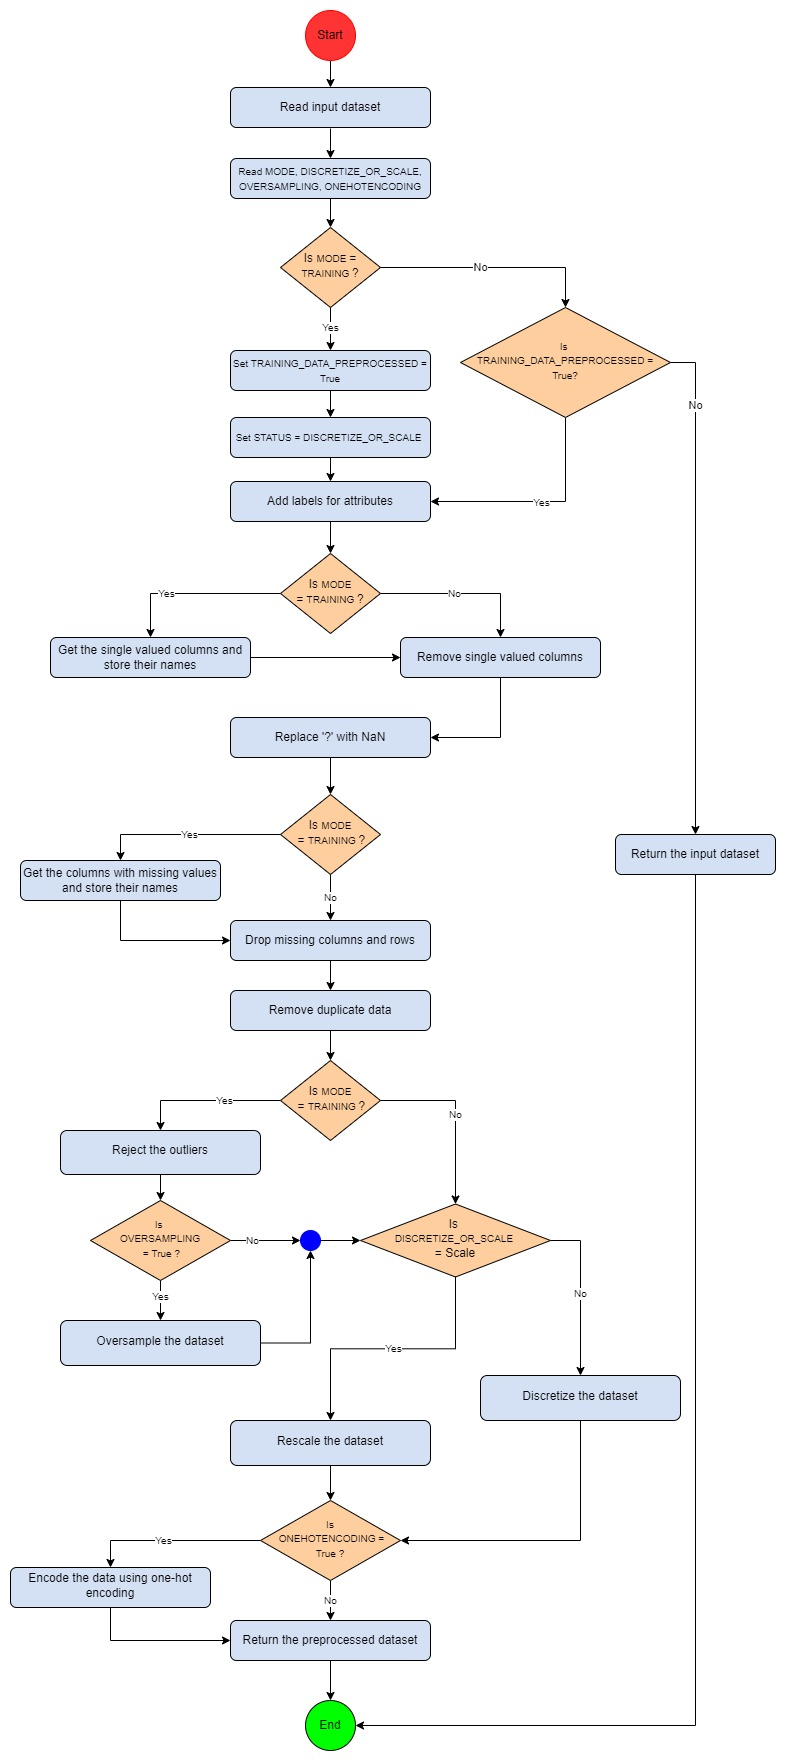

*Figure 4: Data Preprocessing flowchart*

Creating a function to build a preprocessing pipeline using all the preprocessing functions

In [ ]:
def preprocess_data(inp_df, 
                    mode=TRAINING,
                    missing_percent=0,
                    discretize_or_scale=None,
                    oversampling=False,
                    onehotencoding=False):
    """
    This function returns dataframe after preprocessing it through 
    various preprocessing functions.

    Parameters:
    ----------
    inp_df: Pandas dataframe to be preprocessed.
    mode: Constant to choose preprocessing mode for training or testing dataframe. 
        Default is TRAINING.
    missing_percent: Missing percentage required to drop columns if columns 
        missing data more than provided percentage. Default is 0 for dropping
        all the columns missing any data.
    discretize_or_scale: Constant to choose between discretization and scaling of 
        the dataframe.
    oversampling: Boolean value for oversampling the minority class data. Default
        is False for no oversampling.
    onehotencoding: Boolean value for one-hot encoding the categorical features 
        in dataframe. Default is False for no one-hot encoding.

    Returns:
    -------
    preprocessed_df: New pandas preprocessed dataframe. 
    """
    print("Preprocessing the dataframe for", mode)
    np.random.seed(0)

    global GV_SINGLE_VALUED_COLS, GV_MISSING_VALUED_COLS, GV_TRAIN_DATA_PREPROCESSED, GV_TRAIN_DATA_SCALED_OR_DISCRETIZED

    if mode is TRAINING:
        GV_TRAIN_DATA_PREPROCESSED = True
        GV_TRAIN_DATA_SCALED_OR_DISCRETIZED = discretize_or_scale
    elif not GV_TRAIN_DATA_PREPROCESSED:
        print("Cannot perform pre-processing of the test dataset before pre-processing of the training dataset !")
        return inp_df

    # Adding column names to dataframes
    preprocessed_df = add_df_column_names(inp_df)

    # Identifying single valued columns from training dataframe
    if mode is TRAINING:
        GV_SINGLE_VALUED_COLS = get_df_single_valued_cols(preprocessed_df)
        
    # Dropping single valued columns from the dataframe
    preprocessed_df = preprocessed_df.drop(columns=GV_SINGLE_VALUED_COLS)

    # Replace missing value string with NaN in dataframe
    preprocessed_df = replace_df_missing_value_to_nan(preprocessed_df)

    # Identifying missing valued columns from training dataframe
    if mode is TRAINING:
        GV_MISSING_VALUED_COLS = get_df_cols_missing_data(preprocessed_df, missing_percent=missing_percent)
    
    # Dropping missing valued columns from the dataframe
    preprocessed_df = preprocessed_df.drop(columns=GV_MISSING_VALUED_COLS)

    # Dropping missing values in the rows from the dataframe
    preprocessed_df = preprocessed_df.dropna()

    # Dropping duplicated data rows
    preprocessed_df = dropping_rows_duplicated(preprocessed_df)

    if mode is TRAINING:
        preprocessed_df = fixing_continuous_cols_outliers(preprocessed_df)

        # Balance the dataset by duplicating the feautres
        if oversampling:
            preprocessed_df = df_oversampling(preprocessed_df, TARGET_COLUMN)

    # If scaling is enabled, then scale the continuous data cols of training dataframe else discretize
    if GV_TRAIN_DATA_SCALED_OR_DISCRETIZED is SCALE:
        preprocessed_df = rescale_df_cols(preprocessed_df, mode)
    elif GV_TRAIN_DATA_SCALED_OR_DISCRETIZED is DISCRETIZE:
        preprocessed_df = discretize_df_cols(preprocessed_df, mode)

    # One hot encoding of categorical feature vectors
    if onehotencoding:
        preprocessed_df = onehotencoding_categorical_cols(preprocessed_df)

    preprocessed_df = preprocessed_df.reset_index(drop=True)

    print("Data preprocessed successfully")
    return preprocessed_df 

Creating a function that combines preprocessing and splitting of the training and the testing datasets

In [ ]:
def df_preprocess_n_split(training_df, 
                          testing_df, 
                          missing_percent=0, 
                          discretize_or_scale=None, 
                          oversampling=False, 
                          onehotencoding=False):
    '''
    This function calls preprocess_data function to preprocess both training and
    testing dataframes and then calls split_features_n_target_df to split both
    the dataframes into two separate dataframes for features and target.

    Parameters:
    ----------
    training_df: Training dataframe to be preprocessed.
    testing_df: Testing dataframe to be preprocessed.
    missing_percent: Missing percentage required to drop columns if columns 
        missing data more than provided percentage. Default is 0 for dropping
        all the columns missing any data.
    discretize_or_scale: Constant to choose between discretization and scaling of 
        the dataframe.
    oversampling: Boolean value for oversampling the minority class data. Default
        is False for no oversampling.
    onehotencoding: Boolean value for one-hot encoding the categorical features 
        in dataframe. Default is False for no one-hot encoding.

    Returns:
    -------
    DF_TRAIN_X: New pandas preprocessed dataframe containing the training data.
    DF_TRAIN_y: New pandas preprocessed dataframe containing the target training labels.
    DF_TEST_X: New pandas preprocessed dataframe containing the testing data.
    DF_TEST_y: New pandas preprocessed dataframe containing the target testing labels. 

    '''
    DF_TRAIN = preprocess_data(training_df,
                               mode=TRAINING,
                               missing_percent=missing_percent,
                               discretize_or_scale=discretize_or_scale,
                               oversampling=oversampling,
                               onehotencoding=onehotencoding)
    
    DF_TEST = preprocess_data(testing_df,
                              mode=TESTING,
                              onehotencoding=onehotencoding)

    DF_TRAIN_X, DF_TRAIN_y = split_features_n_target_df(DF_TRAIN, TARGET_COLUMN)
    DF_TEST_X, DF_TEST_y = split_features_n_target_df(DF_TEST, TARGET_COLUMN)

    return DF_TRAIN_X.to_numpy(), DF_TRAIN_y.to_numpy(), DF_TEST_X.to_numpy(), DF_TEST_y.to_numpy()

Generating training and testing data without scaling or discretizing features and their corresponding target labels after preprocessing and splitting the dataframes.

In [ ]:
X_train, y_train, X_test, y_test = df_preprocess_n_split(DF_ANNEAL_TRAIN, 
                                                         DF_ANNEAL_TEST,
                                                         missing_percent=10,
                                                         oversampling=True, 
                                                         onehotencoding=True)

Preprocessing the dataframe for training
Adding column names...
Column names added to dataframe successfully
Fetching the columns having single valued data...
Fetched the columns having single valued data successfully
Replaced a missing string with NaN
Fetching the columns having missing data...
Fetched the columns having missing data successfully
Dropped the rows duplicated in a dataframe
Oversampling the dataframe...
Oversampled the dataframe successfully
One-hot encoding the categorical columns in the dateframe...
One-hot encoded the categorical columns in the dateframe successfully
Data preprocessed successfully
Preprocessing the dataframe for testing
Adding column names...
Column names added to dataframe successfully
Replaced a missing string with NaN
Dropped the rows duplicated in a dataframe
One-hot encoding the categorical columns in the dateframe...
One-hot encoded the categorical columns in the dateframe successfully
Data preprocessed successfully
Splitting the dataframe into

Generating training and testing data with discretized features and their corresponding target labels after preprocessing and splitting.

In [ ]:
X_train_dc, y_train_dc, X_test_dc, y_test_dc = df_preprocess_n_split(DF_ANNEAL_TRAIN, 
                                                                     DF_ANNEAL_TEST,
                                                                     missing_percent=10,
                                                                     discretize_or_scale=DISCRETIZE, 
                                                                     oversampling=True, 
                                                                     onehotencoding=True)

Preprocessing the dataframe for training
Adding column names...
Column names added to dataframe successfully
Fetching the columns having single valued data...
Fetched the columns having single valued data successfully
Replaced a missing string with NaN
Fetching the columns having missing data...
Fetched the columns having missing data successfully
Dropped the rows duplicated in a dataframe
Oversampling the dataframe...
Oversampled the dataframe successfully
Discretizing the continuous columns in the dataframe...
Discretized the continuous columns in the dataframe successfully
One-hot encoding the categorical columns in the dateframe...
One-hot encoded the categorical columns in the dateframe successfully
Data preprocessed successfully
Preprocessing the dataframe for testing
Adding column names...
Column names added to dataframe successfully
Replaced a missing string with NaN
Dropped the rows duplicated in a dataframe
Discretizing the continuous columns in the dataframe...
Discretized t

Generating training and testing data with scaled features and their corresponding target labels after preprocessing and splitting.

In [ ]:
X_train_sc, y_train_sc, X_test_sc, y_test_sc = df_preprocess_n_split(DF_ANNEAL_TRAIN, 
                                                                     DF_ANNEAL_TEST,
                                                                     missing_percent=10, 
                                                                     discretize_or_scale=SCALE, 
                                                                     oversampling=True, 
                                                                     onehotencoding=True)

Preprocessing the dataframe for training
Adding column names...
Column names added to dataframe successfully
Fetching the columns having single valued data...
Fetched the columns having single valued data successfully
Replaced a missing string with NaN
Fetching the columns having missing data...
Fetched the columns having missing data successfully
Dropped the rows duplicated in a dataframe
Oversampling the dataframe...
Oversampled the dataframe successfully
Rescaling the continuous columns in the dataframe...
Rescaled the continuous columns in the dataframe successfully
One-hot encoding the categorical columns in the dateframe...
One-hot encoded the categorical columns in the dateframe successfully
Data preprocessed successfully
Preprocessing the dataframe for testing
Adding column names...
Column names added to dataframe successfully
Replaced a missing string with NaN
Dropped the rows duplicated in a dataframe
Rescaling the continuous columns in the dataframe...
Rescaled the continuou

## 4. Technique 1 (20 marks)

**Ensemble Method**

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process



As our dataset is very small to train any model effectively, I decided to go with K-Nearest Neighbor as it is one of the simplest models to implement and doesn’t require any training. It is well known that KNN is a lazy classifier and uses the whole training data to predict a class, thereby reducing the training time and effort. With our limited data, I thought fitting a KNN model was wise as it works well with less featured and discretized data. Moreover, new data can be seamlessly added to the dataset without retraining the model. Unfortunately, the training performance of the KNN model was not so impressive. Then, I decided to go for a probability-based classification model and chose Naive Bayes. The performance of the Naive Bayes model was not better than that of KNN, which compelled me to try for the decision tree classifiers.

The decision tree classifier works well with the imbalanced dataset. Undoubtedly, the performance of the DT classifier outstripped the performance of the previous two models. However, the training accuracy obtained using the DT classifier is sufficient but not up to the mark. That's when I realized investigating the performance of an ensemble of the three discussed models. The Ensemble model uses voting logic on the base learners' predictions for making final predictions. The Ensemble model developed is depicted in *Figure 5* below. The Ensemble method is the best option when the data is imbalanced, and we have multiple weak models.


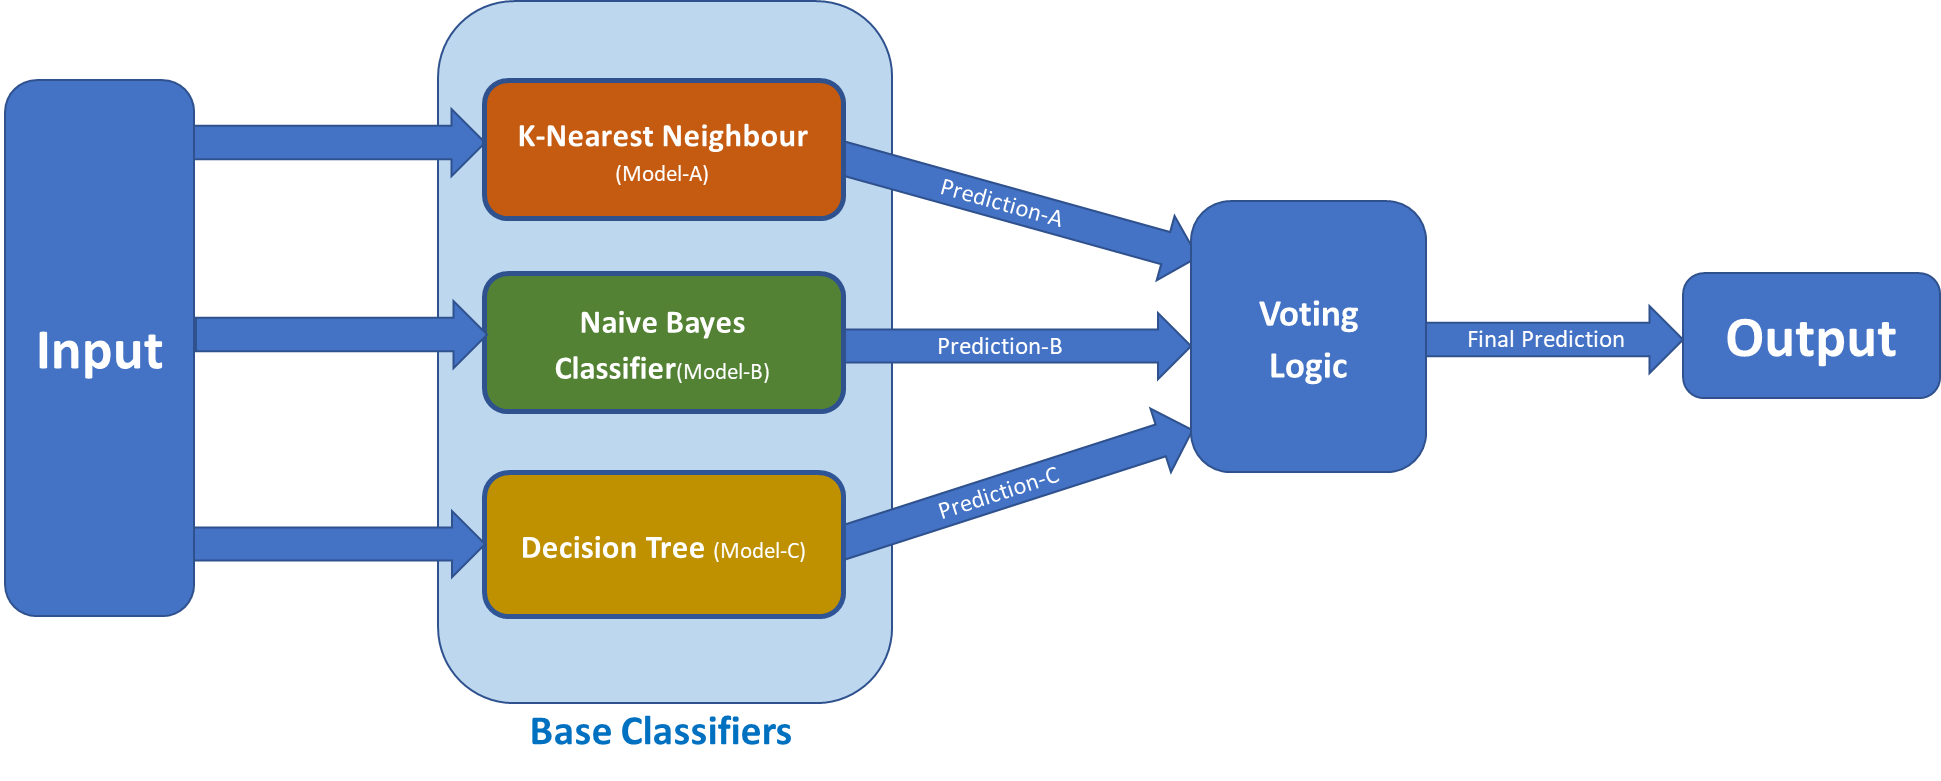

*Figure 5: Ensemble Technique*

The methodology followed for developing the Ensemble model is shown below in *Figure 6*. The significant steps in the implementation process include building base models, training and validation of the models, followed by tuning their hyperparameters and assembling the model predictions to carry out voting for making the final predictions. 

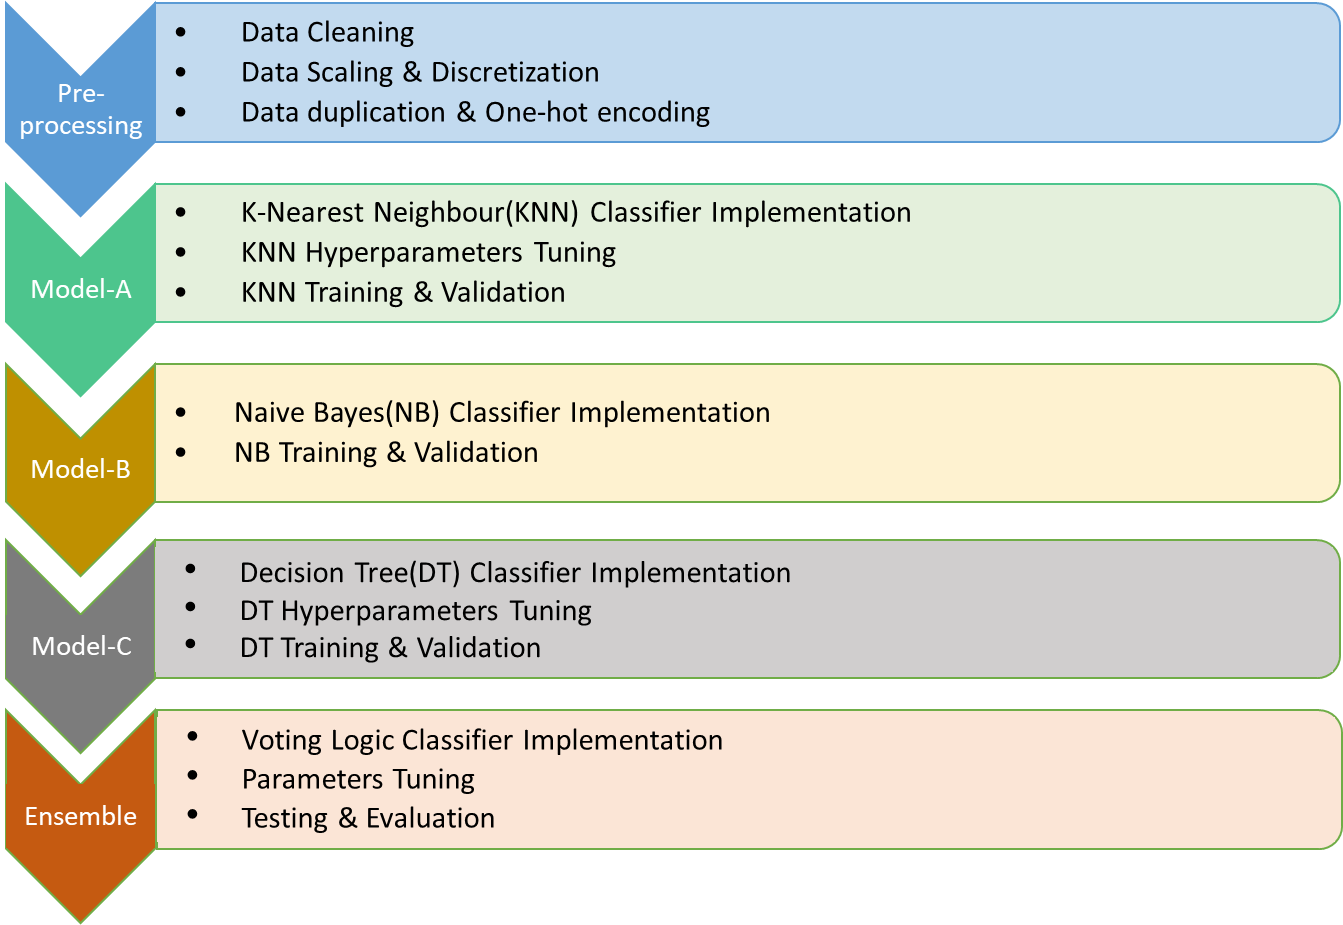

*Figure 6: Ensemble Methodology*

#### Building three base classifiers

In [ ]:
# KNN Models with n_jobs=-1 for parallel runs on all available processors 
knn = KNeighborsClassifier(n_jobs=-1)
knn_dc = KNeighborsClassifier(n_jobs=-1)
knn_sc = KNeighborsClassifier(n_jobs=-1)

#Naive Bayes Models
nb = GaussianNB()
nb_dc = CategoricalNB()        # Naive bayes classifier of multiclass classification
nb_sc = GaussianNB()

#Decision Tree Models with random_state=0 to generate same model everytime
dt = DecisionTreeClassifier(random_state=0)
dt_dc = DecisionTreeClassifier(random_state=0)
dt_sc = DecisionTreeClassifier(random_state=0)

#### Training & validation of the default base models

Splitting the training dataset into training (75%) and validation (25%) subsets.

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train,y_train,test_size=0.25,random_state=0)
X_train_split_dc, X_val_split_dc, y_train_split_dc, y_val_split_dc = train_test_split(X_train_dc,y_train_dc,test_size=0.25,random_state=0)
X_train_split_sc, X_val_split_sc, y_train_split_sc, y_val_split_sc = train_test_split(X_train_sc,y_train_sc,test_size=0.25,random_state=0)

Training base KNN models without cross validation.

In [ ]:
#K-Nearest Neighbour training and validation
knn.fit(X_train_split,y_train_split)
knn_dc.fit(X_train_split_dc,y_train_split_dc)
knn_sc.fit(X_train_split_sc,y_train_split_sc)

print("KNN training accuracies for Normal :", 
      knn.score(X_train_split,y_train_split),
      ", Discretized :",
      knn_dc.score(X_train_split_dc,y_train_split_dc),
      ", Scaled :",
      knn_sc.score(X_train_split_sc,y_train_split_sc))

print("KNN validation accuracies for Normal :", 
      knn.score(X_val_split,y_val_split),
      ", Discretized :",
      knn_dc.score(X_val_split_dc,y_val_split_dc),
      ", Scaled :",
      knn_sc.score(X_val_split_sc,y_val_split_sc))

KNN training accuracies for Normal : 0.9309919901417129 , Discretized : 0.9439309919901417 , Scaled : 0.9525569932224276
KNN validation accuracies for Normal : 0.8892988929889298 , Discretized : 0.9317343173431735 , Scaled : 0.9428044280442804


Training base NB models without cross validation.

In [ ]:
#Naive Bayes training and validation
nb.fit(X_train_split,y_train_split)
nb_dc.fit(X_train_split_dc,y_train_split_dc)
nb_sc.fit(X_train_split_sc,y_train_split_sc)

print("NB training accuracies for Normal :", 
      nb.score(X_train_split,y_train_split),
      ", Discretized :",
      nb_dc.score(X_train_split_dc,y_train_split_dc),
      ", Scaled :",
      nb_sc.score(X_train_split_sc,y_train_split_sc))

print("NB validation accuracies for Normal :", 
      nb.score(X_val_split,y_val_split),
      ", Discretized :",
      nb_dc.score(X_val_split_dc,y_val_split_dc),
      ", Scaled :",
      nb_sc.score(X_val_split_sc,y_val_split_sc))

NB training accuracies for Normal : 0.8089956869993838 , Discretized : 0.9008009858287123 , Scaled : 0.8194701170671596
NB validation accuracies for Normal : 0.7988929889298892 , Discretized : 0.8911439114391144 , Scaled : 0.8081180811808119


Training base DT models without cross validation.

In [ ]:
#Decision Tree training and validation
dt.fit(X_train_split,y_train_split)
dt_dc.fit(X_train_split_dc,y_train_split_dc)
dt_sc.fit(X_train_split_sc,y_train_split_sc)

print("DT training accuracies for Normal :", 
      dt.score(X_train_split,y_train_split),
      ", Discretized :",
      dt_dc.score(X_train_split_dc,y_train_split_dc),
      ", Scaled :",
      dt_sc.score(X_train_split_sc,y_train_split_sc))

print("DT validation accuracies for Normal :", 
      dt.score(X_val_split,y_val_split),
      ", Discretized :",
      dt_dc.score(X_val_split_dc,y_val_split_dc),
      ", Scaled :",
      dt_sc.score(X_val_split_sc,y_val_split_sc))

DT training accuracies for Normal : 0.9919901417128774 , Discretized : 0.9698089956869994 , Scaled : 0.9919901417128774
DT validation accuracies for Normal : 0.974169741697417 , Discretized : 0.940959409594096 , Scaled : 0.974169741697417


#### Building the Ensemble Model

Assembling base models for building the ensemble model

In [ ]:
estimators_1 = [('knn', knn),('dt', dt),('nb', nb)]             # Ensemble for models for unscaled and continuous dataset
estimators_2 = [('knn', knn_dc),('dt', dt_dc),  ('nb', nb_dc)]  # Ensemble for models for discretized dataset
estimators_3 = [('knn', knn_sc),('dt', dt_sc), ('nb', nb_sc)]   # Ensemble for models for scaled dataset

Creating a function to define the ensemble model and train it

In [ ]:
def train_ensemble_model(X, y, estimators, voting='soft'):
    """
    This function implements the Ensemble model and fits the same with the training data.

    Parameters:
    ----------
    X: Training data.
    y: Target labels of the training data.
    estimators: Base classifier objects in a list.
    voting: Type of voting selected for the Ensemble.It can be "soft" or "hard". Default is "soft".
    
    Returns:
    -------
    ensemble: trained ensemble model.

    """
    ensemble = VotingClassifier(estimators=estimators, voting=voting)
    ensemble.fit(X, y)
    return ensemble

#### Training & validation of the Ensemble Model

In [ ]:
ensemble_1 = train_ensemble_model(X_train_split, y_train_split, estimators_1)
ensemble_2 = train_ensemble_model(X_train_split_dc, y_train_split_dc, estimators_2)
ensemble_3 = train_ensemble_model(X_train_split_sc, y_train_split_sc, estimators_3)

print("Ensemble training accuracies for Normal :", 
      ensemble_1.score(X_train_split,y_train_split),
      ", Discretized :",
      ensemble_2.score(X_train_split_dc,y_train_split_dc),
      ", Scaled :",
      ensemble_3.score(X_train_split_sc,y_train_split_sc))

print("Ensemble validation accuracies for Normal :", 
      ensemble_1.score(X_val_split,y_val_split),
      ", Discretized :",
      ensemble_2.score(X_val_split_dc,y_val_split_dc),
      ", Scaled :",
      ensemble_3.score(X_val_split_sc,y_val_split_sc))

Ensemble training accuracies for Normal : 0.9476278496611213 , Discretized : 0.9562538508934073 , Scaled : 0.9562538508934073
Ensemble validation accuracies for Normal : 0.9059040590405905 , Discretized : 0.9446494464944649 , Scaled : 0.9428044280442804


The training and validation performances for the default Ensemble, KNN and DT models are pretty good and that for the default Naive Bayes model is satisfactory for all the three different types of datasets, namely normal, scaled, and discretized, respectively. However, hyperparameter tuning is still required using cross validation for all the three models in order to ensure that the models do not overfit the training data.

### b) Setting hyper parameters with rationale


#### K-Nearest Neighbors

For KNN, the hyperparameter to be used is the number of neighbors ranging from 1 to 10 and p, which denotes the power parameter. P=1 is for Manhattan distance, and P=2 is for Euclidean distance. In the next step, I will be training my KNN models using various combinations of these hyperparameters to identify the best hyperparameter combination for final training and model evaluation.

In [ ]:
knn_n_neighbors_range = list(range(1, 11))
knn_param_grid = [{'n_neighbors': knn_n_neighbors_range,
                   'p':[1,2]}]

#### Naive Bayes

For Naive Bayes classifiers GaussianNB and CategoricalNB, no hyperparameters are required to be tuned. I will be training Naive Bayes classifiers using a K-fold cross-validation process for a different type of preprocessed data.

#### Decision Tree

A decision tree can be trained for a different combination of hyperparameters which includes criterion like *Gini* and *Entropy* to measure the quality of split, maximum depth of tree ranging from 2 to 25, minimum samples required for a split ranging from 2 to 6 & minimum samples needed for a leaf node ranging from 1 to 6.

In [ ]:
dt_max_depth = list(range(2, 26))
dt_min_samples_split = list(range(2, 6))
dt_min_samples_leaf = list(range(1, 6))
dt_param_grid = [{'criterion': ['gini', 'entropy'],
                  'max_depth': dt_max_depth,
                  'min_samples_split': dt_min_samples_split,
                  'min_samples_leaf': dt_min_samples_leaf}]

#### Ensemble Model

For the _VotingClassifier_ used for the Ensemble model, two hyperparameters are of utmost importance. One is the weights assigned to the predictions of all the classes, and the other is regarding the voting methodology used, soft or hard. When it is '_soft_', argmax of the sums of the predicted probabilities is used, whereas when it is '_hard_', majority voting logic is applied to the predicted class labels for concluding the final prediction. 

In [ ]:
es_param_grid = [{'weights':[[1,1,1],[2,1,1],[1,2,1],[1,1,2]],
                  'voting':['soft','hard']}]

### c) Optimising hyper parameters


Identifying the best combination of hyperparameters for any model is tedious as one must choose various combinations of hyperparameters to train and validate a model. So, instead of manually selecting each combination and training the model, GridSearchCV will be used, providing the best parameters for our models. GridSearchCV will use _f1-score_ for scoring/evaluating the models after training them using a combination of various hyperparameters. As our data set is highly imbalanced, _f1-score_ is preferred over accuracy as it can provide a balanced evaluation of the model using two competing metrics, precision, and recall.

Creating a function which will use GridSearchCV to find best combination hyperparameters for a given classifier

In [ ]:
def optimize_classifier_hyperparameters(X, 
                                        y, 
                                        classifier, 
                                        param_grid, 
                                        n_cv=5):    
    """
    Function to optimize the hyperparameters of a classifier.

    Parameters:
    ----------
    X: Training data.
    y: Target labels of the training data.
    classifier: classifier object.
    param_grid: List of the hyperparameters.
    n_cv: Number of splits of the training data to be done during cross validation
    
    Returns:
    -------
    gridsearch: GridSearchCV object.

    """
    # To seed the generator of RandomState
    np.random.seed(0)

    # Creating an object of StratifiedKFold cross-validator
    kfcv = StratifiedKFold(n_splits=n_cv, random_state=0, shuffle=True)  
    
    # Creating an object of GridSearchCV for optimizing the hyperparameters
    gridsearch = GridSearchCV(classifier, 
                              param_grid, 
                              cv=kfcv, 
                              scoring='f1_weighted',
                              return_train_score=True, 
                              refit='f1_weighted',
                              n_jobs=-1)            # To use all the processors available

    # Training the classifier
    gridsearch.fit(X, y)
    
    return gridsearch

#### K-Nearest Neighbors

Optimizing hyperparameters for the unscaled and continuous dataset.

In [ ]:
knn_gs = optimize_classifier_hyperparameters(X_train, 
                                             y_train, 
                                             knn, 
                                             knn_param_grid, 
                                             n_cv=5)

knn_gs.best_params_

{'n_neighbors': 3, 'p': 1}

After optimizing the KNN classifier for the undiscretized and unscaled data, best hyperparameters returned by GridSearchCV are n_neighbors = 3 and p = 1.

Optimizing hyperparameters for the discretized dataset.

In [ ]:
knn_gs_dc = optimize_classifier_hyperparameters(X_train_dc, 
                                                y_train_dc, 
                                                knn_dc, 
                                                knn_param_grid, 
                                                n_cv=5)

knn_gs_dc.best_params_

{'n_neighbors': 5, 'p': 1}

GridSearchCV optimized KNN classifer for the discretized dataset and returned best hyperparameters as n_neighbors = 5 and p = 1.

Optimizing hyperparameters for the scaled dataset.

In [ ]:
knn_gs_sc = optimize_classifier_hyperparameters(X_train_sc, 
                                                y_train_sc, 
                                                knn_sc, 
                                                knn_param_grid, 
                                                n_cv=5)

knn_gs_sc.best_params_

{'n_neighbors': 3, 'p': 1}

For scaled dataset, GridSearchCV optimized the KNN classifier and returned best hyperparameters as n_neighbors = 3 and P = 1.

Getting best estimators for KNN

In [ ]:
best_knn = knn_gs.best_estimator_
best_knn_dc = knn_gs_dc.best_estimator_
best_knn_sc = knn_gs_sc.best_estimator_

#### Naive Bayes

Since there are no hyperparameters for Naive Bayes classifiers, I will be training the classifiers for different dataset using cross validation to generate efficient model.

Creating a function to train the dataset using K-fold cross validation.

In [ ]:
def classifier_cross_validation_training(kfold,
                                         classifier,
                                         X_train,
                                         y_train,
                                         verbose=True):
    """
    This function will train the classifier kfold times using cross validation.

    Parameters:
    ----------
    kfold: Number of folds run during cross validation.
    classifier: classifier object.
    X_train: Training data.
    y_train: Target labels of the training data.
    verbose: Boolean value to print the training accuracy and testing accuracy
    
    Returns:
    -------
    classifier : Classifier object.
    model_train_score : Training accuracy.
    model_val_score : Validation accuracy.
    """
    # To seed the generator of RandomState
    np.random.seed(0)

    # Creating an object of StratifiedKFold cross validator
    skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=0)
    
    # List to store train and validation accuracy score
    model_train_score = []
    model_val_score = []

    fold = 0

    # Split the train data set K times, train the model and store the accuracy score in the lists 
    for train_indx, val_indx in skf.split(X_train, y_train):
        fold += 1
        kf_X_train, kf_X_val = X_train[train_indx], X_train[val_indx]
        kf_y_train, kf_y_val = y_train[train_indx], y_train[val_indx]
        
        # Training the model
        classifier.fit(kf_X_train, kf_y_train)
        
        model_train_score.append(classifier.score(kf_X_train, kf_y_train))
        model_val_score.append(classifier.score(kf_X_val, kf_y_val))

        if verbose:
            print("Fold ", fold, 
                "- Train Score: ", round(model_train_score[fold-1], 4), 
                " Validation Score: ", round(model_val_score[fold-1], 4))
        
    print("Mean train score = ", np.mean(model_train_score))
    print("Mean validation score = ", np.mean(model_val_score))
    return classifier, model_train_score, model_val_score

Training the Gaussian Naive Bayes model for the unscaled and undiscretized dataset.

In [ ]:
nb, train_scores, val_scores = classifier_cross_validation_training(10, nb, X_train, y_train)

Fold  1 - Train Score:  0.8075  Validation Score:  0.7972
Fold  2 - Train Score:  0.8075  Validation Score:  0.7972
Fold  3 - Train Score:  0.8044  Validation Score:  0.8249
Fold  4 - Train Score:  0.807  Validation Score:  0.8018
Fold  5 - Train Score:  0.8039  Validation Score:  0.8295
Fold  6 - Train Score:  0.8091  Validation Score:  0.7824
Fold  7 - Train Score:  0.804  Validation Score:  0.8287
Fold  8 - Train Score:  0.8071  Validation Score:  0.8009
Fold  9 - Train Score:  0.8091  Validation Score:  0.7824
Fold  10 - Train Score:  0.805  Validation Score:  0.8194
Mean train score =  0.8064664077718999
Mean validation score =  0.8064580133128519


Training the Categorical Naive Bayes model for the discretized dataset.

In [ ]:
nb_dc, train_scores_dc, val_scores_dc = classifier_cross_validation_training(10, nb_dc, X_train_dc, y_train_dc)

Fold  1 - Train Score:  0.905  Validation Score:  0.8848
Fold  2 - Train Score:  0.9066  Validation Score:  0.8894
Fold  3 - Train Score:  0.8999  Validation Score:  0.8756
Fold  4 - Train Score:  0.9061  Validation Score:  0.894
Fold  5 - Train Score:  0.903  Validation Score:  0.9032
Fold  6 - Train Score:  0.9051  Validation Score:  0.9167
Fold  7 - Train Score:  0.9046  Validation Score:  0.8981
Fold  8 - Train Score:  0.9015  Validation Score:  0.9398
Fold  9 - Train Score:  0.9076  Validation Score:  0.9028
Fold  10 - Train Score:  0.8964  Validation Score:  0.9028
Mean train score =  0.9035669848066139
Mean validation score =  0.9007189793480117


Training the Gaussian Naive Bayes model for the scaled dataset.

In [ ]:
nb_sc, train_scores_sc, val_scores_sc = classifier_cross_validation_training(10, nb_sc, X_train_sc, y_train_sc)

Fold  1 - Train Score:  0.8167  Validation Score:  0.8157
Fold  2 - Train Score:  0.8183  Validation Score:  0.8018
Fold  3 - Train Score:  0.8147  Validation Score:  0.8341
Fold  4 - Train Score:  0.8183  Validation Score:  0.8018
Fold  5 - Train Score:  0.8137  Validation Score:  0.8433
Fold  6 - Train Score:  0.8189  Validation Score:  0.7963
Fold  7 - Train Score:  0.8143  Validation Score:  0.838
Fold  8 - Train Score:  0.8173  Validation Score:  0.8102
Fold  9 - Train Score:  0.8184  Validation Score:  0.8009
Fold  10 - Train Score:  0.8158  Validation Score:  0.8241
Mean train score =  0.8166280975975676
Mean validation score =  0.816621863799283


Creating a function to plot cross validation performance



In [ ]:
def plot_cross_validation_performance(classifier_name, 
                                      train_scores, 
                                      val_scores, 
                                      plot_error=False):
    """
    This function will plot the cross validation results.

    Parameters:
    ----------  
    classifier_name: classifier name.
    train_scores: Training scores
    val_scores: Validation scores    
    plot_error: Boolean value to select error plotting vs accuracy plotting

    Returns:
    -------
    None
    """
    fold = range(0, len(train_scores)+1)
    train_score_list = list(train_scores)
    train_score_list.insert(0, 0.0)
    val_score_list = list(val_scores)
    val_score_list.insert(0,0.0)

    if plot_error:
        train_data = 1 - np.array(train_score_list)
        val_data = 1 - np.array(val_score_list)
        train_label = "Train error"
        val_label = "Validation error"
        ylabel = "Error"
    else:
        train_data = train_score_list
        val_data = val_score_list
        train_label = "Train accuracy"
        val_label = "Validation accuracy"
        ylabel = "Score"

    fig, axs = plt.subplots(figsize=(10,5))
    axs.plot(fold, train_data, 'b-', label=train_label)
    axs.plot(fold, val_data, 'r--', label=val_label)
    axs.grid(True)
    axs.set_ylim((-0.1, 1.2))
    axs.set_xlabel('Cross Validation Fold', fontsize=12)
    axs.set_ylabel(ylabel, fontsize=12)
    axs.set_title(classifier_name + ' Cross Validation Performance', fontsize=15)
    axs.legend(fontsize=10)
    fig.tight_layout()
    fig.show()

Plot of NB model trained for unscaled and continuous data.

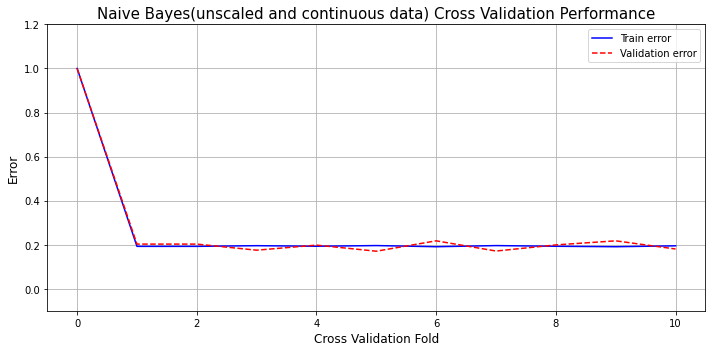

In [ ]:
plot_cross_validation_performance('Naive Bayes(unscaled and continuous data)', 
                                  train_scores, 
                                  val_scores, 
                                  plot_error=True)

Plot of NB model trained for discretized data.

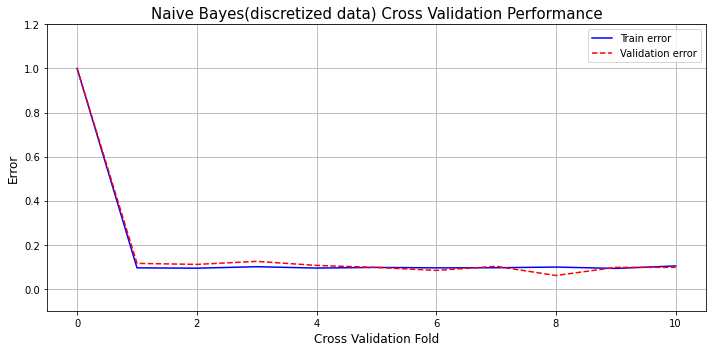

In [ ]:
plot_cross_validation_performance('Naive Bayes(discretized data)', train_scores_dc, val_scores_dc, plot_error=True)

Plot of NB model trained for scaled data.

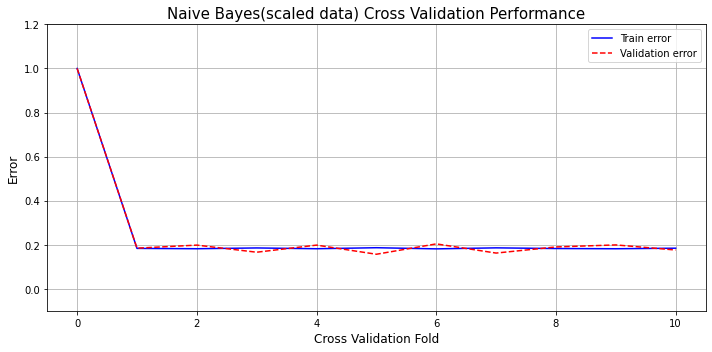

In [ ]:
plot_cross_validation_performance('Naive Bayes(scaled data)', train_scores_sc, val_scores_sc, plot_error=True)

#### Decision Tree

Optimizing hyperparameters for unscaled and continuous dataset.

In [ ]:
dt_gs = optimize_classifier_hyperparameters(X_train, 
                                            y_train, 
                                            dt, 
                                            dt_param_grid, 
                                            n_cv=5)

dt_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

After training with the unscaled and continuous dataset using GridSearchCV, best hyperparameters returned are criterion = 'entropy', max_depth = 17, min_samples_leaf = 1 and min_samples_split = 2.

Optimizing hyperparameters for the discretized dataset.

In [ ]:
dt_gs_dc = optimize_classifier_hyperparameters(X_train_dc, 
                                               y_train_dc, 
                                               dt_dc, 
                                               dt_param_grid, 
                                               n_cv=5)

dt_gs_dc.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

For discretized dataset, best hyperparameters returned by GridSearchCV are criterion = 'entropy', max_depth = 14, min_samples_leaf = 1 and min_samples_split = 2.

Optimizing hyperparameters for the scaled dataset.

In [ ]:
dt_gs_sc = optimize_classifier_hyperparameters(X_train_sc, 
                                               y_train_sc, 
                                               dt_sc, 
                                               dt_param_grid, 
                                               n_cv=5)

dt_gs_sc.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

For scaled dataset, best hyperparameters are criterion = 'entropy', max_depth = 18, min_samples_leaf = 1 and min_samples_split = 2.

Getting best estimators for DT

In [ ]:
best_dt = dt_gs.best_estimator_
best_dt_dc = dt_gs_dc.best_estimator_
best_dt_sc = dt_gs_sc.best_estimator_

#### Ensemble Model

Creating list of best estimators from each category of dataset

In [ ]:
best_estimators_1 = [('knn', best_knn),('dt', best_dt),('nb', nb)]             # Ensemble for models for unscaled and continuous dataset
best_estimators_2 = [('knn', best_knn_dc),('dt', best_dt_dc),  ('nb', nb_dc)]  # Ensemble for models for discretized dataset
best_estimators_3 = [('knn', best_knn_sc),('dt', best_dt_sc), ('nb', nb_sc)]   # Ensemble for models for scaled dataset

Creating Ensemble models using best estimators

In [ ]:
ensemble_1 = VotingClassifier(estimators=best_estimators_1)
ensemble_2 = VotingClassifier(estimators=best_estimators_2)
ensemble_3 = VotingClassifier(estimators=best_estimators_3)

Optimizing hyperparameters for unscaled and continuous dataset.

In [ ]:
es_gs = optimize_classifier_hyperparameters(X_train, 
                                            y_train, 
                                            ensemble_1, 
                                            es_param_grid, 
                                            n_cv=10)

es_gs.best_params_

{'voting': 'soft', 'weights': [1, 2, 1]}

After training with the unscaled and continuous dataset using GridSearchCV, best hyperparameters returned are voting = 'soft' and weights = [1,2,1].

Optimizing hyperparameters for the discretized dataset.

In [ ]:
es_gs_dc= optimize_classifier_hyperparameters(X_train_dc, 
                                              y_train_dc, 
                                              ensemble_2, 
                                              es_param_grid, 
                                              n_cv=10)

es_gs_dc.best_params_

{'voting': 'soft', 'weights': [1, 2, 1]}

After training with the discretized dataset using GridSearchCV, best hyperparameters returned are voting = 'soft' and weights = [1,2,1].

Optimizing hyperparameters for the scaled dataset.

In [ ]:
es_gs_sc= optimize_classifier_hyperparameters(X_train_sc, 
                                              y_train_sc, 
                                              ensemble_3, 
                                              es_param_grid, 
                                              n_cv=10)

es_gs_sc.best_params_

{'voting': 'soft', 'weights': [1, 2, 1]}

After training with the scaled dataset using GridSearchCV, best hyperparameters returned are voting = 'soft' and weights = [1,2,1].

Getting best estimators for Ensemble models

In [ ]:
best_ensemble_1 = es_gs.best_estimator_
best_ensemble_2 = es_gs_dc.best_estimator_
best_ensemble_3 = es_gs_sc.best_estimator_

### d) Performance metrics for training

In this project, for analyzing the performance of our models, balanced accuracy, misclassification rate, f1-score, precision, recall, mean absolute error, and mean squared error, along with confusion matrix, are evaluated as ours is a multiclass classification problem.

Balanced accuracy is a metric favoured for imbalanced data and is the average of specificity and sensitivity of a model. In addition, the f1-score, precision and recall describe how well the model can predict. In contrast, misclassification rate, mean squared error and mean absolute error throws light on how erroneous the model can be. Finally, the confusion matrix is used to visualize the number of correct and incorrect predictions for all the valid classes.


Creating a function to analyse and report the training and testing performances.

In [ ]:
def print_model_analysis_report(model, X, y, model_name=None): 
    
    """
    This function prints the model performance analysis report and plots the confusion matrix too.

    Parameters:
    ----------
    Model: classifier object.
    X: Training data.
    y: Target labels of the training data.

    Returns:
    -------
    None       
    """
    np.random.seed(0)
    
    # Predict class using trained model
    y_pred = model.predict(X)

    y_pred = np.where(y_pred == 'U', 0, y_pred).astype(int)
    y_true = np.where(y == 'U', 0, y).astype(int)
    
    if model_name is None:
        model_name = ''

    print(f"------------- {model_name} Model Analysis Report --------------\n")
    print("Classification Accuracy :", round(accuracy_score(y_true, y_pred)*100, 3), "%")
    print("Balanced Accuracy :", round(balanced_accuracy_score(y_true, y_pred)*100, 3), "%")
    print("F1 score :", round(f1_score(y_true, y_pred, average='weighted')*100, 3), "%")
    print("Mean Absolute Error(L1 Loss) :", round(mean_absolute_error(y_true, y_pred)*100, 3), "%")
    print("Mean Squared Error(L2 Loss) :", round(mean_squared_error(y_true, y_pred)*100, 3), "%")
    print("Misclassification Rate :", round((1-accuracy_score(y_true, y_pred))*100, 3), "%")

    print(f"\n------------- {model_name} Model Classification Report --------------\n")
    target_names = ['Class '+ str(val) if val != 0 else 'Class U' for val in np.unique(y_pred)]
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    print(f"\n------------- {model_name} Model Confusion Matrix --------------\n")
    ConfusionMatrixDisplay.from_estimator(model, X, y, cmap='GnBu')
    
    plt.show()

#### K-Nearest Neighbors

KNN model's training performance analysis

------------- KNN Model Analysis Report --------------

Classification Accuracy : 97.136 %
Balanced Accuracy : 97.136 %
F1 score : 97.096 %
Mean Absolute Error(L1 Loss) : 4.665 %
Mean Squared Error(L2 Loss) : 8.545 %
Misclassification Rate : 2.864 %

------------- KNN Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.99      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.94      1.00      0.97       433
     Class 3       0.97      0.88      0.93       433
     Class 5       0.95      0.97      0.96       433

    accuracy                           0.97      2165
   macro avg       0.97      0.97      0.97      2165
weighted avg       0.97      0.97      0.97      2165


------------- KNN Model Confusion Matrix --------------



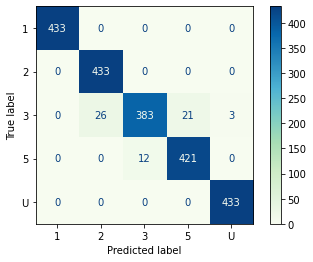

In [ ]:
# For unscaled and continuous data
print_model_analysis_report(best_knn, X_train, y_train, 'KNN')

------------- KNN Model Analysis Report --------------

Classification Accuracy : 94.781 %
Balanced Accuracy : 94.781 %
F1 score : 94.606 %
Mean Absolute Error(L1 Loss) : 9.053 %
Mean Squared Error(L2 Loss) : 16.998 %
Misclassification Rate : 5.219 %

------------- KNN Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.99      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.93      1.00      0.96       433
     Class 3       0.97      0.77      0.85       433
     Class 5       0.87      0.97      0.92       433

    accuracy                           0.95      2165
   macro avg       0.95      0.95      0.95      2165
weighted avg       0.95      0.95      0.95      2165


------------- KNN Model Confusion Matrix --------------



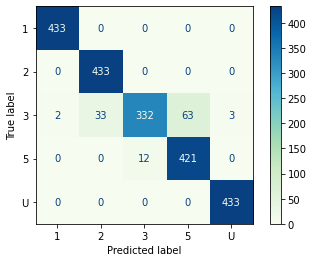

In [ ]:
# For discretized data
print_model_analysis_report(best_knn_dc, X_train_dc, y_train_dc, 'KNN')

------------- KNN Model Analysis Report --------------

Classification Accuracy : 97.46 %
Balanced Accuracy : 97.46 %
F1 score : 97.432 %
Mean Absolute Error(L1 Loss) : 4.249 %
Mean Squared Error(L2 Loss) : 7.76 %
Misclassification Rate : 2.54 %

------------- KNN Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.96      1.00      0.98       433
     Class 3       0.97      0.90      0.93       433
     Class 5       0.95      0.97      0.96       433

    accuracy                           0.97      2165
   macro avg       0.97      0.97      0.97      2165
weighted avg       0.97      0.97      0.97      2165


------------- KNN Model Confusion Matrix --------------



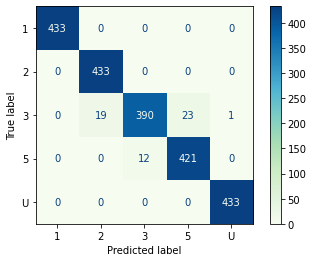

In [ ]:
# For scaled data
print_model_analysis_report(best_knn_sc, X_train_sc, y_train_sc, 'KNN')

#### Naive Bayes

Naive Bayes model's training performance analysis

------------- Naive Bayes Model Analysis Report --------------

Classification Accuracy : 80.647 %
Balanced Accuracy : 80.647 %
F1 score : 75.379 %
Mean Absolute Error(L1 Loss) : 36.582 %
Mean Squared Error(L2 Loss) : 79.908 %
Misclassification Rate : 19.353 %

------------- Naive Bayes Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.82      1.00      0.90       433
     Class 1       0.82      1.00      0.90       433
     Class 2       0.81      0.88      0.84       433
     Class 3       1.00      0.15      0.26       433
     Class 5       0.76      1.00      0.87       433

    accuracy                           0.81      2165
   macro avg       0.84      0.81      0.75      2165
weighted avg       0.84      0.81      0.75      2165


------------- Naive Bayes Model Confusion Matrix --------------



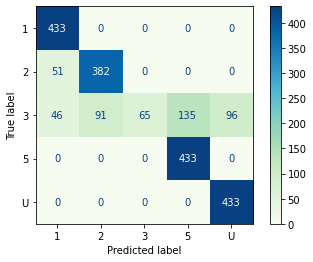

In [ ]:
# For unscaled and continuous data
print_model_analysis_report(nb, X_train, y_train, 'Naive Bayes')

------------- Naive Bayes Model Analysis Report --------------

Classification Accuracy : 89.7 %
Balanced Accuracy : 89.7 %
F1 score : 89.264 %
Mean Absolute Error(L1 Loss) : 21.247 %
Mean Squared Error(L2 Loss) : 52.656 %
Misclassification Rate : 10.3 %

------------- Naive Bayes Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.97      0.97      0.97       433
     Class 1       0.85      1.00      0.92       433
     Class 2       0.92      0.94      0.93       433
     Class 3       0.95      0.64      0.77       433
     Class 5       0.82      0.94      0.88       433

    accuracy                           0.90      2165
   macro avg       0.90      0.90      0.89      2165
weighted avg       0.90      0.90      0.89      2165


------------- Naive Bayes Model Confusion Matrix --------------



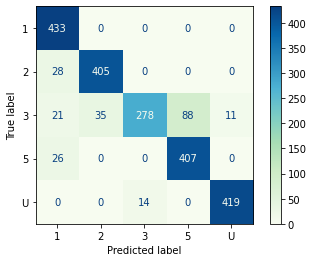

In [ ]:
# For discretized data
print_model_analysis_report(nb_dc, X_train_dc, y_train_dc, 'Naive Bayes')

------------- Naive Bayes Model Analysis Report --------------

Classification Accuracy : 81.663 %
Balanced Accuracy : 81.663 %
F1 score : 76.351 %
Mean Absolute Error(L1 Loss) : 35.566 %
Mean Squared Error(L2 Loss) : 79.076 %
Misclassification Rate : 18.337 %

------------- Naive Bayes Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.82      1.00      0.90       433
     Class 1       0.86      1.00      0.92       433
     Class 2       0.81      0.93      0.87       433
     Class 3       1.00      0.15      0.26       433
     Class 5       0.76      1.00      0.87       433

    accuracy                           0.82      2165
   macro avg       0.85      0.82      0.76      2165
weighted avg       0.85      0.82      0.76      2165


------------- Naive Bayes Model Confusion Matrix --------------



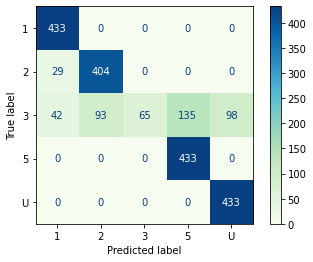

In [ ]:
# For scaled data
print_model_analysis_report(nb_sc, X_train_sc, y_train_sc, 'Naive Bayes')

#### Decision Tree

Decision tree model's training performance analysis

------------- Decision Tree Model Analysis Report --------------

Classification Accuracy : 99.169 %
Balanced Accuracy : 99.169 %
F1 score : 99.164 %
Mean Absolute Error(L1 Loss) : 1.339 %
Mean Squared Error(L2 Loss) : 2.356 %
Misclassification Rate : 0.831 %

------------- Decision Tree Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.98      1.00      0.99       433
     Class 3       1.00      0.96      0.98       433
     Class 5       0.98      1.00      0.99       433

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165


------------- Decision Tree Model Confusion Matrix --------------



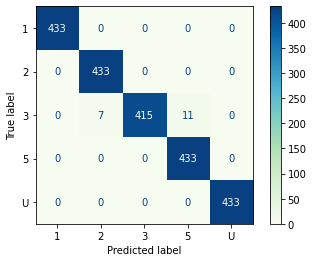

In [ ]:
# For unscaled and continuous data
print_model_analysis_report(best_dt, X_train, y_train, 'Decision Tree')

------------- Decision Tree Model Analysis Report --------------

Classification Accuracy : 96.536 %
Balanced Accuracy : 96.536 %
F1 score : 96.486 %
Mean Absolute Error(L1 Loss) : 6.143 %
Mean Squared Error(L2 Loss) : 11.501 %
Misclassification Rate : 3.464 %

------------- Decision Tree Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.96      1.00      0.98       433
     Class 3       0.97      0.85      0.91       433
     Class 5       0.90      0.97      0.94       433

    accuracy                           0.97      2165
   macro avg       0.97      0.97      0.96      2165
weighted avg       0.97      0.97      0.96      2165


------------- Decision Tree Model Confusion Matrix --------------



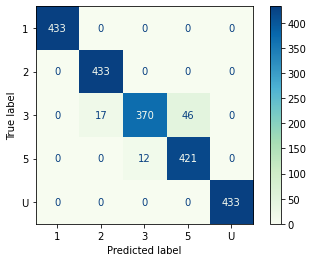

In [ ]:
# For discretized data
print_model_analysis_report(best_dt_dc, X_train_dc, y_train_dc, 'Decision Tree')

------------- Decision Tree Model Analysis Report --------------

Classification Accuracy : 99.169 %
Balanced Accuracy : 99.169 %
F1 score : 99.164 %
Mean Absolute Error(L1 Loss) : 1.339 %
Mean Squared Error(L2 Loss) : 2.356 %
Misclassification Rate : 0.831 %

------------- Decision Tree Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.98      1.00      0.99       433
     Class 3       1.00      0.96      0.98       433
     Class 5       0.98      1.00      0.99       433

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165


------------- Decision Tree Model Confusion Matrix --------------



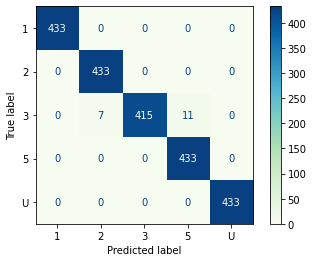

In [ ]:
# For scaled data
print_model_analysis_report(best_dt_sc, X_train_sc, y_train_sc, 'Decision Tree')

#### Ensemble Method

Ensemble model's training performance analysis

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 99.169 %
Balanced Accuracy : 99.169 %
F1 score : 99.164 %
Mean Absolute Error(L1 Loss) : 1.339 %
Mean Squared Error(L2 Loss) : 2.356 %
Misclassification Rate : 0.831 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.98      1.00      0.99       433
     Class 3       1.00      0.96      0.98       433
     Class 5       0.98      1.00      0.99       433

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165


------------- Ensemble Model Confusion Matrix --------------



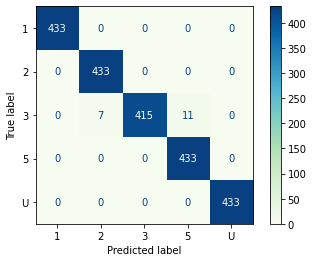

In [ ]:
# For unscaled and continuous data
print_model_analysis_report(best_ensemble_1, X_train, y_train, 'Ensemble')

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 96.49 %
Balanced Accuracy : 96.49 %
F1 score : 96.415 %
Mean Absolute Error(L1 Loss) : 6.236 %
Mean Squared Error(L2 Loss) : 11.686 %
Misclassification Rate : 3.51 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.96      1.00      0.98       433
     Class 3       1.00      0.82      0.90       433
     Class 5       0.88      1.00      0.94       433

    accuracy                           0.96      2165
   macro avg       0.97      0.96      0.96      2165
weighted avg       0.97      0.96      0.96      2165


------------- Ensemble Model Confusion Matrix --------------



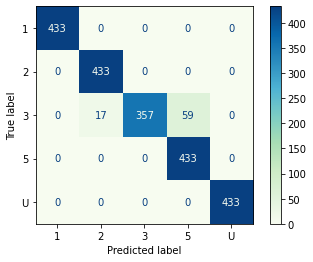

In [ ]:
# For discretized data
print_model_analysis_report(best_ensemble_2, X_train_dc, y_train_dc, 'Ensemble')

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 99.169 %
Balanced Accuracy : 99.169 %
F1 score : 99.164 %
Mean Absolute Error(L1 Loss) : 1.339 %
Mean Squared Error(L2 Loss) : 2.356 %
Misclassification Rate : 0.831 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.98      1.00      0.99       433
     Class 3       1.00      0.96      0.98       433
     Class 5       0.98      1.00      0.99       433

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165


------------- Ensemble Model Confusion Matrix --------------



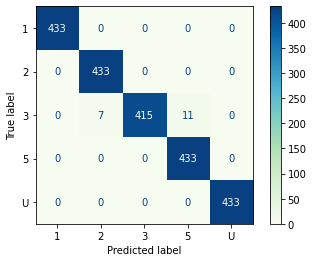

In [ ]:
# For scaled data
print_model_analysis_report(best_ensemble_3, X_train_sc, y_train_sc, 'Ensemble')

## 5. Technique 2 (20 marks)

### Multilayer Perceptron

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

The Multilayer Perceptron (MLP) or multilayer Artificial Neural Network (ANN) is a neural network model that consists of three different layers: an input layer that receives the input data, multiple hidden layers with numerous hidden nodes in each of the layers, and an output layer that generates final predictions. Each node in the hidden layers contains a non-linear activation function like ReLU, tanh etc. The predictions are usually the class probabilities, and the class with the highest probability is the predicted output. The multilayer perceptron implemented is shown below in _Figure 7_. To note, the number of hidden layers and the number of nodes in each layer will be chosen after hyperparameter tuning.

A multilayer perceptron models the correlation between the linear and non-linear training data. In addition, there is no doubt that MLP excels in modeling non-linear data using non-linear activation functions. Thus, the primary motivation behind choosing MLP is to see how effectively a neural network model can fit our training data which is a small, sparse, and imbalanced dataset. It is also assumed that the MLP model should capture the non-linearities of our dataset and provide better accuracies for both scaled and discretized datasets.



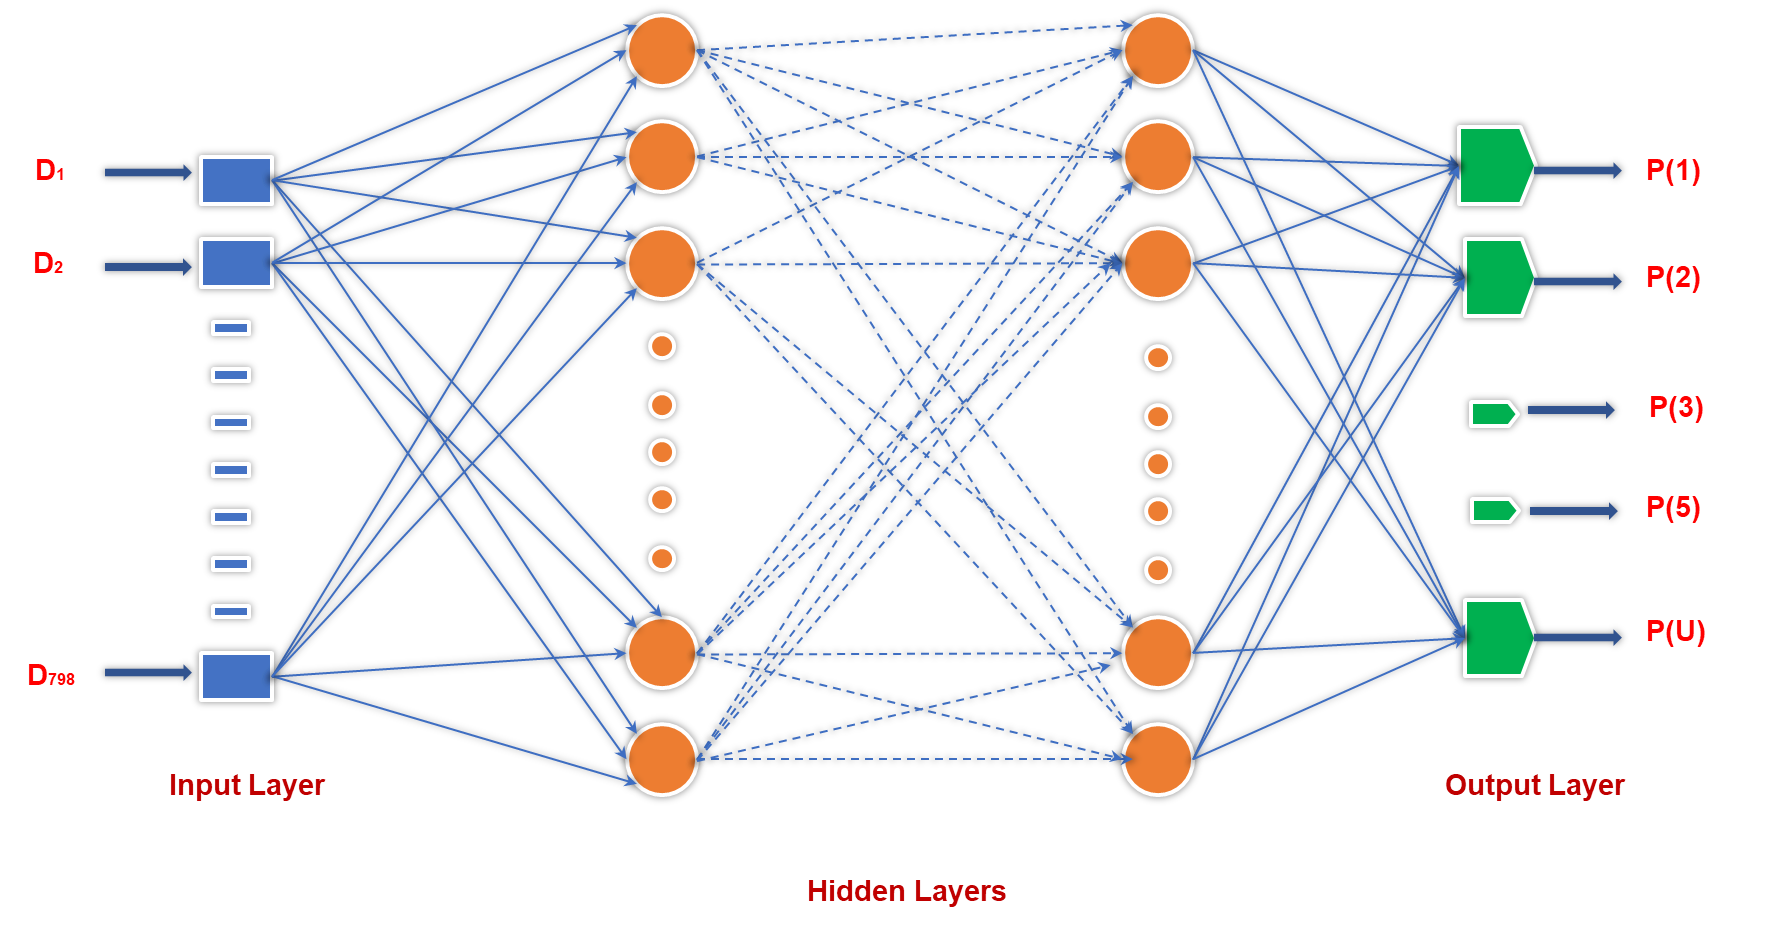

*Figure 7: Multilayer Perceptron Model*

The methodology followed in technique 2 is similar to the methodology followed in technique 1 in which the hyperparameters of a default MLP model are tuned before training and validation and then the best MLP model is selected based on the training performance, for final testing and evaluation, as presented in Figure 8 below. 

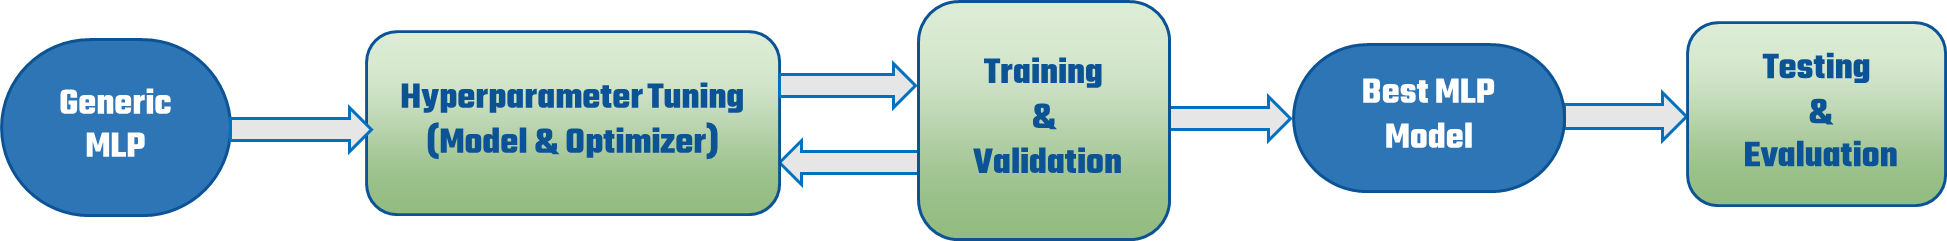

*Figure 8: MLP methodology*

#### Building of an MLP model

In [ ]:
mlp = MLPClassifier(random_state=0, early_stopping=True, max_iter=1000, warm_start=True)
mlp_dc = MLPClassifier(random_state=0, early_stopping=True, max_iter=1000, warm_start=True)
mlp_sc = MLPClassifier(random_state=0, early_stopping=True, max_iter=1000, warm_start=True)

In the MLPClassifier imported from sklearn library, some input arguments are configured, such as *random_state* is set to 0 for repeatable training results, *early_stopping* is enabled to stop the training upon convergence of the optimizer, *max_iteration* - known as epochs - is set to a large number, 1000 here, to allow the optimiser to converges, and *warm_start* is enabled to initialise model weights by copying them from a previously trained model which ultimately reduces the time spent for training.

#### Training and validation of the default MLP model

In [ ]:
mlp.fit(X_train_split,y_train_split)
mlp_dc.fit(X_train_split_dc,y_train_split_dc)
mlp_sc.fit(X_train_split_sc,y_train_split_sc)

print("MLP training accuracies for Normal :", 
      mlp.score(X_train_split,y_train_split),
      ", Discretized :",
      mlp_dc.score(X_train_split_dc,y_train_split_dc),
      ", Scaled :",
      mlp_sc.score(X_train_split_sc,y_train_split_sc))

print("MLP Validation accuracies for Normal :", 
      mlp.score(X_val_split,y_val_split),
      ", Discretized :",
      mlp_dc.score(X_val_split_dc,y_val_split_dc),
      ", Scaled :",
      mlp_sc.score(X_val_split_sc,y_val_split_sc))

MLP training accuracies for Normal : 0.8016019716574245 , Discretized : 0.8508934072704868 , Scaled : 0.8552064078866297
MLP Validation accuracies for Normal : 0.8025830258302583 , Discretized : 0.8413284132841329 , Scaled : 0.8357933579335793


As the training and validation accuracies of the default MLP classifier are not well-to-do, next we can optimize the hyperparameters of the MLP model.

### b) Setting hyper parameters with rationale


The performance of an MLP classifier heavily depends on the number of hidden layers present in the network and number of nodes in each of the hidden layers. During the training of an MLP, an optimizer is used which tries to reduce the classification loss of the model. The optimizer performance is decided by three important parameters, namely, batch size, learning rate, and regularisation rate(alpha). Thus, four parameters of the MLP classifier are only tuned, as shown in the code cell below. 

In [ ]:
mlp_param_grid = [{'hidden_layer_sizes' : [(10, 10), (10, 20, 10), (10,20,20,10), (10,20,20,20,10)],
                   'alpha' : [0.0001, 0.001, 0.01],
                   'batch_size' : [16, 32, 64],
                   'learning_rate_init' : [0.0001, 0.001, 0.01]}]

### c) Optimising hyper parameters


Optimizing hyperparameters for the unscaled and continuous dataset.

In [ ]:
mlp_gs = optimize_classifier_hyperparameters(X_train, y_train, mlp, mlp_param_grid)
mlp_gs.best_params_

{'alpha': 0.001,
 'batch_size': 32,
 'hidden_layer_sizes': (10, 20, 20, 20, 10),
 'learning_rate_init': 0.01}

After optimizing the MLP classifier for the undiscretized and unscaled data, best hyperparameters returned by GridSearchCV are alpha = 0.001, batch_size = 32, learning_rate_init = 0.01, and hidden_layer_sizes = (10, 20, 20, 20, 10).

Optimizing hyperparameters for the discretized dataset.

In [ ]:
mlp_gs_dc = optimize_classifier_hyperparameters(X_train_dc, y_train_dc, mlp_dc, mlp_param_grid)
mlp_gs_dc.best_params_

{'alpha': 0.001,
 'batch_size': 32,
 'hidden_layer_sizes': (10, 20, 20, 10),
 'learning_rate_init': 0.001}

GridSearchCV optimized KNN classifer for the discretized dataset and returned best hyperparameters of alpha = 0.001, batch_size = 32, learning_rate_init = 0.001, and hidden_layer_sizes = (10, 20, 20, 10).

Optimizing hyperparameters for the scaled dataset.

In [ ]:
mlp_gs_sc = optimize_classifier_hyperparameters(X_train_sc, y_train_sc, mlp_sc, mlp_param_grid)
mlp_gs_sc.best_params_

{'alpha': 0.01,
 'batch_size': 32,
 'hidden_layer_sizes': (10, 20, 20, 20, 10),
 'learning_rate_init': 0.001}

For scaled dataset, GridSearchCV optimized the KNN classifier and returned best hyperparameters of alpha = 0.0001, batch_size = 64, learning_rate_init = 0.01, and hidden_layer_sizes = (10, 10).

Getting best estimators for MLP classifiers

In [ ]:
best_mlp_1 = mlp_gs.best_estimator_
best_mlp_2 = mlp_gs_dc.best_estimator_
best_mlp_3 = mlp_gs_sc.best_estimator_

### d) Performance metrics for training

MLP model's training performance analysis

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 69.607 %
Balanced Accuracy : 69.607 %
F1 score : 68.816 %
Mean Absolute Error(L1 Loss) : 76.628 %
Mean Squared Error(L2 Loss) : 225.081 %
Misclassification Rate : 30.393 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.92      0.94      0.93       433
     Class 1       0.96      0.86      0.91       433
     Class 2       0.56      0.66      0.61       433
     Class 3       0.85      0.28      0.42       433
     Class 5       0.47      0.73      0.57       433

    accuracy                           0.70      2165
   macro avg       0.75      0.70      0.69      2165
weighted avg       0.75      0.70      0.69      2165


------------- Multilayer Perceptron Model Confusion Matrix --------------



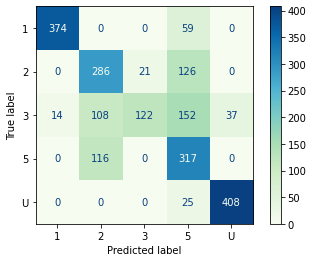

In [ ]:
# For unscaled and continuous dataset
print_model_analysis_report(best_mlp_1, X_train, y_train, 'Multilayer Perceptron')

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 92.794 %
Balanced Accuracy : 92.794 %
F1 score : 92.293 %
Mean Absolute Error(L1 Loss) : 12.24 %
Mean Squared Error(L2 Loss) : 22.587 %
Misclassification Rate : 7.206 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.99      1.00      1.00       433
     Class 1       0.99      1.00      0.99       433
     Class 2       0.90      1.00      0.95       433
     Class 3       1.00      0.64      0.78       433
     Class 5       0.82      1.00      0.90       433

    accuracy                           0.93      2165
   macro avg       0.94      0.93      0.92      2165
weighted avg       0.94      0.93      0.92      2165


------------- Multilayer Perceptron Model Confusion Matrix --------------



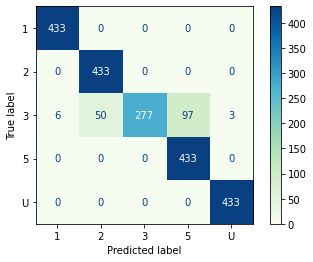

In [ ]:
# For discretized dataset
print_model_analysis_report(best_mlp_2, X_train_dc, y_train_dc, 'Multilayer Perceptron')

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 91.871 %
Balanced Accuracy : 91.871 %
F1 score : 91.291 %
Mean Absolute Error(L1 Loss) : 13.072 %
Mean Squared Error(L2 Loss) : 23.141 %
Misclassification Rate : 8.129 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00       433
     Class 1       1.00      1.00      1.00       433
     Class 2       0.87      0.98      0.92       433
     Class 3       0.97      0.61      0.75       433
     Class 5       0.81      1.00      0.90       433

    accuracy                           0.92      2165
   macro avg       0.93      0.92      0.91      2165
weighted avg       0.93      0.92      0.91      2165


------------- Multilayer Perceptron Model Confusion Matrix --------------



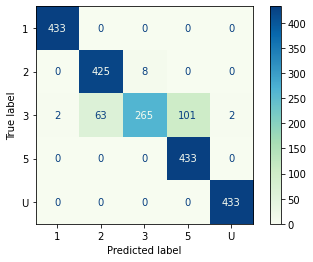

In [ ]:
# For scaled dataset
print_model_analysis_report(best_mlp_3, X_train_sc, y_train_sc, 'Multilayer Perceptron')

## 6. Comparison of metrics performance for testing (16 marks)


### a) Use of cross validation for both techniques to deal with over-fitting

Till now, only for hyperparameter tuning, all the models are cross-validated. With the optimized hyperparameters, both Ensemble and MLP model showed promising *f1-score* for training data. However, there is a strong possibility that both the models are overfitting on the training data and may not show the same performance for test data.

So to achieve high *f1-score* for the test data, the best Ensemble and MLP models are required to be trained multiple times using cross validation.

#### Ensemble Model

In [ ]:
# For unscaled and continuous dataset
best_ensemble_1_cv, es_train_scores_1, es_val_scores_1 = classifier_cross_validation_training(10, 
                                                                                           best_ensemble_1, 
                                                                                           X_train, 
                                                                                           y_train)

Fold  1 - Train Score:  0.9913  Validation Score:  0.977
Fold  2 - Train Score:  0.9938  Validation Score:  0.9677
Fold  3 - Train Score:  0.9908  Validation Score:  0.9862
Fold  4 - Train Score:  0.9908  Validation Score:  0.9816
Fold  5 - Train Score:  0.9923  Validation Score:  0.9862
Fold  6 - Train Score:  0.9923  Validation Score:  0.9769
Fold  7 - Train Score:  0.9913  Validation Score:  0.9815
Fold  8 - Train Score:  0.9903  Validation Score:  0.9907
Fold  9 - Train Score:  0.9928  Validation Score:  0.963
Fold  10 - Train Score:  0.9918  Validation Score:  0.9861
Mean train score =  0.9917372463949816
Mean validation score =  0.9796765659668886


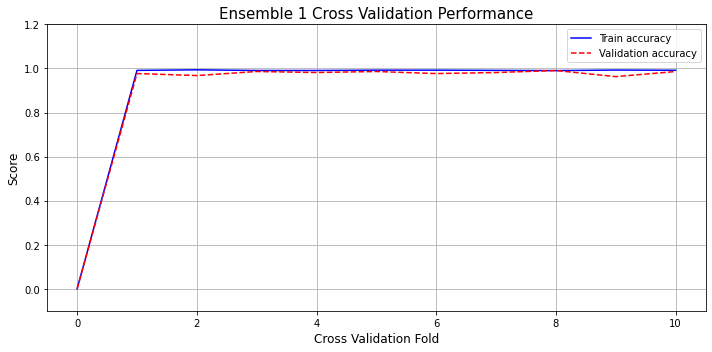

In [ ]:
# plotting cross validation performance of Ensemble 1 model
plot_cross_validation_performance('Ensemble 1', es_train_scores_1, es_val_scores_1)

In [ ]:
# For discretized dataset
best_ensemble_2_cv, es_train_scores_2, es_val_scores_2 = classifier_cross_validation_training(10, 
                                                                                           best_ensemble_2, 
                                                                                           X_train_dc, 
                                                                                           y_train_dc)

Fold  1 - Train Score:  0.9666  Validation Score:  0.9447
Fold  2 - Train Score:  0.9641  Validation Score:  0.9539
Fold  3 - Train Score:  0.9656  Validation Score:  0.9539
Fold  4 - Train Score:  0.9666  Validation Score:  0.9539
Fold  5 - Train Score:  0.9641  Validation Score:  0.9677
Fold  6 - Train Score:  0.9615  Validation Score:  0.9722
Fold  7 - Train Score:  0.9641  Validation Score:  0.963
Fold  8 - Train Score:  0.9631  Validation Score:  0.9676
Fold  9 - Train Score:  0.9666  Validation Score:  0.9398
Fold  10 - Train Score:  0.9646  Validation Score:  0.9676
Mean train score =  0.9646909698334216
Mean validation score =  0.9584378733572283


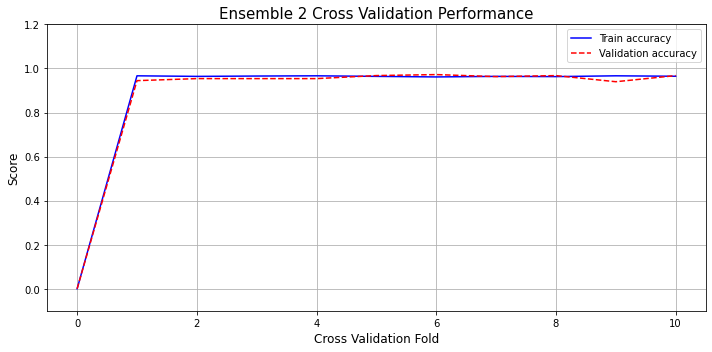

In [ ]:
# plotting cross validation performance of Ensemble 2 model
plot_cross_validation_performance('Ensemble 2', es_train_scores_2, es_val_scores_2)

In [ ]:
# For scaled data
best_ensemble_3_cv, es_train_scores_3, es_val_scores_3 = classifier_cross_validation_training(10, 
                                                                                           best_ensemble_3, 
                                                                                           X_train_sc, 
                                                                                           y_train_sc)

Fold  1 - Train Score:  0.9913  Validation Score:  0.977
Fold  2 - Train Score:  0.9938  Validation Score:  0.9631
Fold  3 - Train Score:  0.9908  Validation Score:  0.9862
Fold  4 - Train Score:  0.9908  Validation Score:  0.9816
Fold  5 - Train Score:  0.9923  Validation Score:  0.9862
Fold  6 - Train Score:  0.9923  Validation Score:  0.9769
Fold  7 - Train Score:  0.9913  Validation Score:  0.9815
Fold  8 - Train Score:  0.9903  Validation Score:  0.9815
Fold  9 - Train Score:  0.9928  Validation Score:  0.9583
Fold  10 - Train Score:  0.9918  Validation Score:  0.9861
Mean train score =  0.9917372463949816
Mean validation score =  0.9778268475849121


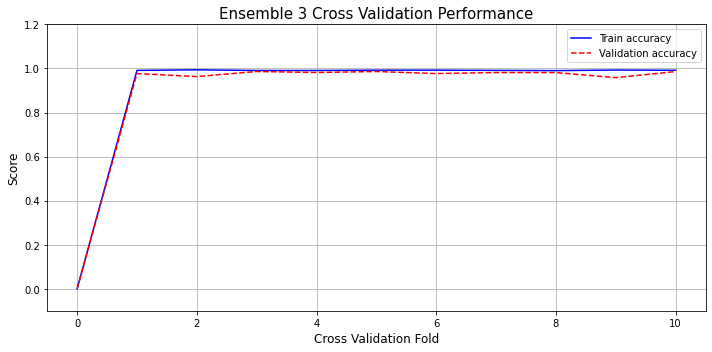

In [ ]:
# plotting cross validation performance of Ensemble 3 model
plot_cross_validation_performance('Ensemble 3', es_train_scores_3, es_val_scores_3)

Among the three Ensemble models trained and validated here, the model trained with the scaled data performs the best in terms of training and validation accuracies. It is evident from the smooth validation curve of the model trained with the scaled data shown in the plot for Ensemble 3 model above.

#### Multilayer Perceptron

In [ ]:
# For unscaled and continuous dataset
best_mlp_1_cv, mlp_train_scores_1, mlp_val_scores_1 = classifier_cross_validation_training(50, 
                                                                                        best_mlp_1,
                                                                                        X_train, 
                                                                                        y_train, 
                                                                                        verbose=False)

Mean train score =  0.7004543630611881
Mean validation score =  0.6893023255813954


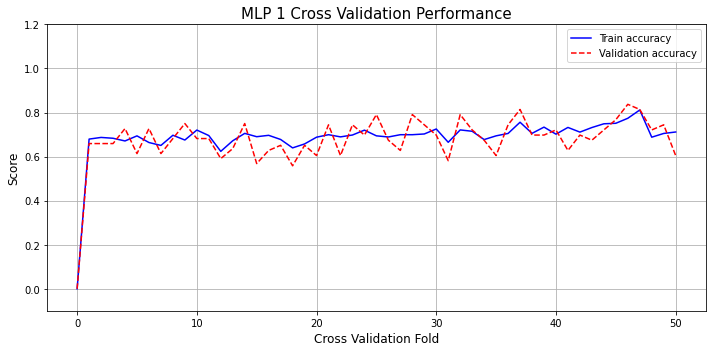

In [ ]:
# plotting cross validation performance of normal MLP model
plot_cross_validation_performance('MLP 1', mlp_train_scores_1, mlp_val_scores_1)

In [ ]:
# For discretized dataset
best_mlp_2_cv, mlp_train_scores_2, mlp_val_scores_2 = classifier_cross_validation_training(50, 
                                                                                        best_mlp_2, 
                                                                                        X_train_dc, 
                                                                                        y_train_dc,
                                                                                        verbose=False)

Mean train score =  0.9285287158041239
Mean validation score =  0.9280655391120507


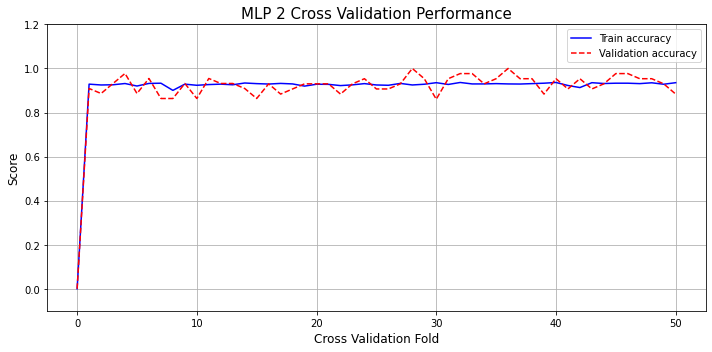

In [ ]:
# plotting cross validation performance of discretized MLP model
plot_cross_validation_performance('MLP 2', mlp_train_scores_2, mlp_val_scores_2)

In [ ]:
# For scaled dataset
best_mlp_3_cv, mlp_train_scores_3, mlp_val_scores_3 = classifier_cross_validation_training(50, 
                                                                                        best_mlp_3, 
                                                                                        X_train_sc, 
                                                                                        y_train_sc,
                                                                                        verbose=False)

Mean train score =  0.9136909038958291
Mean validation score =  0.9128118393234672


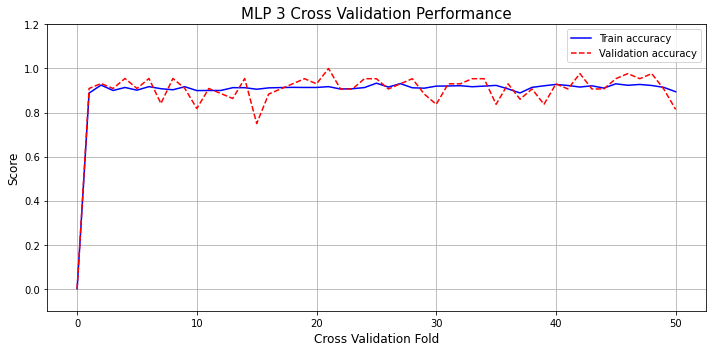

In [ ]:
# plotting cross validation performance of scaled MLP model
plot_cross_validation_performance('MLP 3', mlp_train_scores_3, mlp_val_scores_3)

Among the three multilayer perceptron models trained and validated here, the model trained with the discretized data performs the best in terms of training and validation accuracies. The plot of MLP 3 model above shows how well the training and the validation curves fit.

#### Analysis

Studying the effect of increase in cross validation folds on training performance of MLP model

In [ ]:
# For kfold = 10
_,_,_=classifier_cross_validation_training(10, best_mlp_1, X_train, y_train, verbose=False)

Mean train score =  0.8040548620205381
Mean validation score =  0.7939793480116061


In [ ]:
# For kfold = 25
_,_,_=classifier_cross_validation_training(25, best_mlp_1, X_train, y_train, verbose=False)

Mean train score =  0.8142244388057669
Mean validation score =  0.8142101042502005


In [ ]:
# For kfold = 50
_,_,_=classifier_cross_validation_training(50, best_mlp_1, X_train, y_train, verbose=False)

Mean train score =  0.8441706982062148
Mean validation score =  0.8439323467230444


In [ ]:
%%time
# For kfold = 100
_,_,_=classifier_cross_validation_training(100, best_mlp_1, X_train, y_train, verbose=False)

Mean train score =  0.8490676974146999
Mean validation score =  0.8456926406926406
CPU times: user 10.4 s, sys: 19.4 s, total: 29.8 s
Wall time: 8.1 s


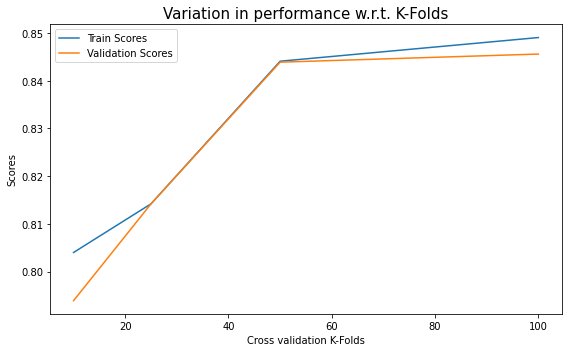

In [ ]:
mean_train_scores = [0.8040, 0.8142, 0.8441, 0.84906]
mean_val_scores = [0.7939, 0.8142, 0.8439, 0.8456]
kfolds = [10, 25, 50, 100]

fig, axs = plt.subplots(figsize=(8, 5))
axs.plot(kfolds, mean_train_scores, label='Train Scores')
axs.plot(kfolds, mean_val_scores, label='Validation Scores')
axs.set_xlabel('Cross validation K-Folds')
axs.set_ylabel('Scores')
axs.set_title('Variation in performance w.r.t. K-Folds', fontsize=15)
axs.legend(fontsize=10)
fig.tight_layout()
fig.show()

From the plot above, we can see that when k-fold = 100, highest validation accuracy and training accuracy are obtained. Thus, for the MLP model, it is observed that both test and validation accuracies increase as the number of folds for the cross validation is increased. 

In [ ]:
%%time
# For kfold = 100
_,_,_=classifier_cross_validation_training(100, best_ensemble_1, X_train, y_train, verbose=False)

Mean train score =  0.9918585458730612
Mean validation score =  0.9805844155844156
CPU times: user 18.4 s, sys: 300 ms, total: 18.7 s
Wall time: 26 s


It is important to note that the time taken for training the MLP model with cross validation is about 29.8 seconds, while the time taken for training the Ensemble model with the same cross validation settings is approximately 18.7 seconds. Thus, the time to train a MLP model using the unscaled and continuous data is more that the time required to train an Ensemble model. In other words, training is slower for MLP model compared to the Ensemble model.

### b) Comparison with appropriate metrics for testing

#### Ensemble Model

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 92.683 %
Balanced Accuracy : 87.579 %
F1 score : 92.771 %
Mean Absolute Error(L1 Loss) : 10.976 %
Mean Squared Error(L2 Loss) : 20.732 %
Misclassification Rate : 7.317 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.86      1.00      0.92         6
     Class 2       0.75      0.90      0.82        10
     Class 3       0.97      0.94      0.95        63
     Class 5       1.00      0.67      0.80         3

    accuracy                           0.93        82
   macro avg       0.89      0.88      0.87        82
weighted avg       0.93      0.93      0.93        82


------------- Ensemble Model Confusion Matrix --------------



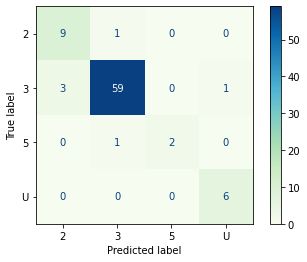

In [ ]:
# For unscaled and continuous data
print_model_analysis_report(best_ensemble_1_cv, X_test, y_test, 'Ensemble')

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 84.146 %
Balanced Accuracy : 83.135 %
F1 score : 85.883 %
Mean Absolute Error(L1 Loss) : 29.268 %
Mean Squared Error(L2 Loss) : 60.976 %
Misclassification Rate : 15.854 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.83      0.83      0.83         6
     Class 2       0.71      1.00      0.83        10
     Class 3       0.96      0.83      0.89        63
     Class 5       0.25      0.67      0.36         3

    accuracy                           0.84        82
   macro avg       0.69      0.83      0.73        82
weighted avg       0.90      0.84      0.86        82


------------- Ensemble Model Confusion Matrix --------------



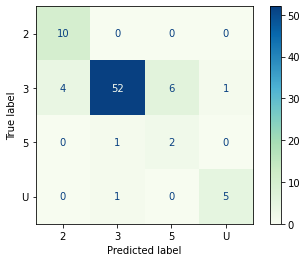

In [ ]:
# For discretized data
print_model_analysis_report(best_ensemble_2_cv, X_test_dc, y_test_dc, 'Ensemble')

------------- Ensemble Model Analysis Report --------------

Classification Accuracy : 92.683 %
Balanced Accuracy : 95.516 %
F1 score : 93.173 %
Mean Absolute Error(L1 Loss) : 7.317 %
Mean Squared Error(L2 Loss) : 7.317 %
Misclassification Rate : 7.317 %

------------- Ensemble Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00         6
     Class 2       0.64      0.90      0.75        10
     Class 3       0.98      0.92      0.95        63
     Class 5       1.00      1.00      1.00         3

    accuracy                           0.93        82
   macro avg       0.91      0.96      0.93        82
weighted avg       0.94      0.93      0.93        82


------------- Ensemble Model Confusion Matrix --------------



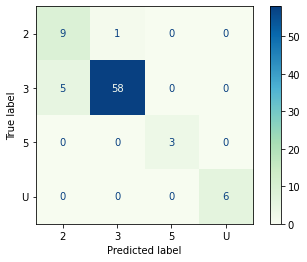

In [ ]:
# For scaled data
print_model_analysis_report(best_ensemble_3_cv, X_test_sc, y_test_sc, 'Ensemble')

For the Ensemble model trained with scaled data, highest f1-score of 93.173% and lowest mean squared error of 7.317% is obtained.

#### Multilayer Perceptron

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 45.122 %
Balanced Accuracy : 66.27 %
F1 score : 49.881 %
Mean Absolute Error(L1 Loss) : 81.707 %
Mean Squared Error(L2 Loss) : 140.244 %
Misclassification Rate : 54.878 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       1.00      1.00      1.00         6
     Class 1       0.00      0.00      0.00         0
     Class 2       0.27      1.00      0.43        10
     Class 3       1.00      0.32      0.48        63
     Class 5       0.06      0.33      0.10         3

    accuracy                           0.45        82
   macro avg       0.47      0.53      0.40        82
weighted avg       0.88      0.45      0.50        82


------------- Multilayer Perceptron Model Confusion Matrix --------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divi

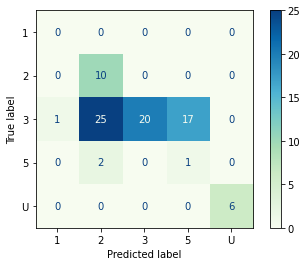

In [ ]:
# For unscaled and continuous dataset
print_model_analysis_report(best_mlp_1_cv, X_test, y_test, 'Multilayer Perceptron')

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 73.171 %
Balanced Accuracy : 91.27 %
F1 score : 77.197 %
Mean Absolute Error(L1 Loss) : 45.122 %
Mean Squared Error(L2 Loss) : 84.146 %
Misclassification Rate : 26.829 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.86      1.00      0.92         6
     Class 2       0.56      1.00      0.71        10
     Class 3       1.00      0.65      0.79        63
     Class 5       0.19      1.00      0.32         3

    accuracy                           0.73        82
   macro avg       0.65      0.91      0.69        82
weighted avg       0.91      0.73      0.77        82


------------- Multilayer Perceptron Model Confusion Matrix --------------



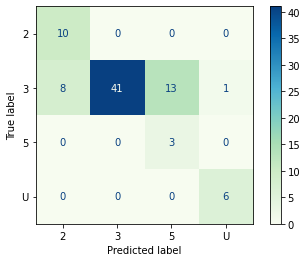

In [ ]:
# For discretized dataset
print_model_analysis_report(best_mlp_2_cv, X_test_dc, y_test_dc, 'Multilayer Perceptron')

------------- Multilayer Perceptron Model Analysis Report --------------

Classification Accuracy : 69.512 %
Balanced Accuracy : 82.143 %
F1 score : 73.302 %
Mean Absolute Error(L1 Loss) : 46.341 %
Mean Squared Error(L2 Loss) : 80.488 %
Misclassification Rate : 30.488 %

------------- Multilayer Perceptron Model Classification Report --------------

              precision    recall  f1-score   support

     Class U       0.86      1.00      0.92         6
     Class 2       0.43      1.00      0.61        10
     Class 3       0.97      0.62      0.76        63
     Class 5       0.17      0.67      0.27         3

    accuracy                           0.70        82
   macro avg       0.61      0.82      0.64        82
weighted avg       0.87      0.70      0.73        82


------------- Multilayer Perceptron Model Confusion Matrix --------------



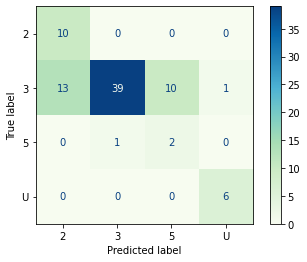

In [ ]:
# For scaled dataset
print_model_analysis_report(best_mlp_3_cv, X_test_sc, y_test_sc, 'Multilayer Perceptron')

For the MLP model trained with discretized data, highest f1-score of 77.197% and lowest mean squared error of 84.146% is obtained.

### c) Model selection

Creating a function to obtain f1-score of a model with the test data.

In [ ]:
def get_model_f1_score(model, X, y):
    """
    This function gives the f1 score of the model passed as an argument for a test data input.

    Parameters:
    ----------
    model: classifier object.
    X: Input test data.
    y: True target labels of the test data.
    
    Returns:
    -------
    f1 : f1-score of the model
    """
    y_pred = model.predict(X)
    y_pred = np.where(y_pred == 'U', 0, y_pred).astype(int)
    y_true = np.where(y == 'U', 0, y).astype(int)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

Generating f1-score for all the models for the test dataset.

In [ ]:
ensemble_f1_scores = []

ensemble_f1_scores.append(get_model_f1_score(best_ensemble_1_cv, X_test, y_test))
ensemble_f1_scores.append(get_model_f1_score(best_ensemble_2_cv, X_test_dc, y_test_dc))
ensemble_f1_scores.append(get_model_f1_score(best_ensemble_3_cv, X_test_sc, y_test_sc))

mlp_f1_scores = []
mlp_f1_scores.append(get_model_f1_score(best_mlp_1_cv, X_test, y_test))
mlp_f1_scores.append(get_model_f1_score(best_mlp_2_cv, X_test_dc, y_test_dc))
mlp_f1_scores.append(get_model_f1_score(best_mlp_3_cv, X_test_sc, y_test_sc))

Plotting of the test performances of both the models

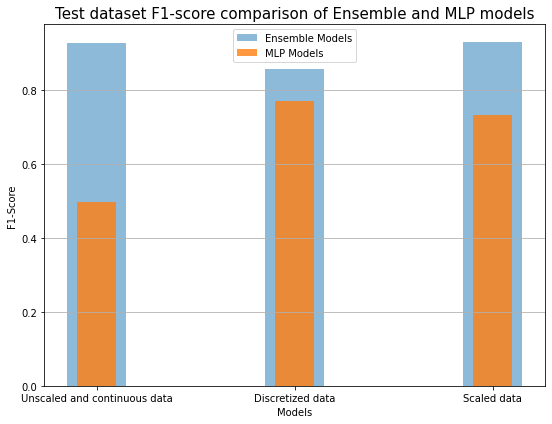

In [ ]:
fig, axs = plt.subplots(figsize=(8,6))
models = ['Unscaled and continuous data', 
          'Discretized data', 
          'Scaled data']

axs.bar(models, ensemble_f1_scores, alpha=0.5, width=0.3, label='Ensemble Models')
axs.bar(models, mlp_f1_scores, alpha=0.8, width=0.2, label='MLP Models')
axs.set_xlabel('Models', fontsize=10)
axs.set_ylabel('F1-Score', fontsize=10)
axs.set_title('Test dataset F1-score comparison of Ensemble and MLP models', fontsize=15)
axs.grid(True, axis='y')
axs.legend()
fig.tight_layout()
fig.show()

From the above plot, it is evident that the test performance of the Ensemble models are better than that of the MLP models. MLP model trained with discretized data performed well on testing dataset,  whereas Ensemble model trained with scaled data performed the best on the testing dataset.

Thus, the best model selected for this case study is the **Ensemble model** trained with scaled data. The testing accuracy of the best model is **93.173%**.

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency


For this case study, the Ensemble model is selected as our best model due to the following observations:
1. **Overfitting**: As the training accuracy of the best model is about 99% and the test accuracy is about 93%, the model is not extremely overfitting. Thus, the model generalizes well and is ideal for classifying the six steel annealing classes.
2. **Complexity**: As it is an Ensemble model, and it comprises three base learners, intutively, the best model is complex in terms of design and execution complexities. However, it took around 18 seconds to train and validate the best model which is reasonable.
3. **Efficiency**: As the best model has a meagre misclassification rate and a low mean squared error, it can be deduced that the classification efficiency of the best model is appropriately high. Additionally, despite the imbalanced and sparse dataset with insufficient data for each class, the testing accuracy and f1-score are high.
4. **Flexibility**: Having three sub-models inside the Ensemble model makes it quite flexible when swapping the base learners to cater to various unseen requirements. More than three base learners will undoubtedly improve the classification performance while adding to the complexity on the other hand.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

From a business perspective, the following points are noticeable:

1. **Interpretation of results**: The classification performance of the Ensemble model is excellent in terms of its higher f1-score, which means the model’s tendency to misclassify is negligible. With such a small dataset, if the model accuracies are high, its performance will undoubtedly enhance significantly if trained with the large dataset.    
2. **Relevance**: The best model is well-capable of modelling imbalanced annealing data with sparse attributes without overfitting much, making the model highly relevant for classifying annealing data with fewer features.
3. **Balance with technical perspective**: Low overfitting and higher accuracy make the chosen Ensemble model a good option from a technical perspective for classifying various steel annealing classes.
4. **Robustness**: Using different base classifiers makes the Ensemble model highly adaptable and enables it to capture the complex relationships of highly imbalanced and sparse datasets. Hence, the Ensemble model is robust to noisy attributes and performs well when the training data has high variance.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?

The following things are accomplished in this project:
1.	The dataset was extensively analyzed and was found to be highly imbalanced and sparse. The dataset was lacking in the number of instances without any missing values, and many attributes with more than 10% missing values were also detected. The data analysis dictated the necessary preprocessing actions.
2.	Data preprocessing is accomplished by carrying out a multitude of activities comprising labelling the attributes, fixing missing values and outliers, removing duplicate instances and noisy attributes, feature scaling, oversampling, binarization and discretization.
3.	Two techniques, one Ensemble and the other Multilayer Perceptron are implemented end-to-end, starting from the model selection, followed by training, validation, and hyperparameter optimization until testing and evaluation.
4.	Comparison of the testing performances of both the trained models is carried out, and the best model is determined with testing accuracy of 93.17%.

The following actions could not be accomplished in this project:
1.	In this project, all the instances with missing values are dropped and cannot perform an imputation of the missing values in the feature columns.
2.	As annealing Class 4 data is missing in training and test datasets, none of the models could be trained to predict Class 4 instances. 
3.	Instances of Annealing Class 1 are absent in the testing dataset. As a result, an evaluation of Class 1 could not be carried out.
4.	Due to higher computation times required for training the MLP models with multiple hidden layers with numerous hidden nodes, MLP models could not optimize the hyperparameters as with an increase in the number of hidden layers, the time to train increases drastically.


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

If I were given this project again, I would install the following additions:
1.	One-hot encoding of the target labels while training the MLP model to assess the improvement in the MLP performance.
2.	Imputation of the missing values of the attributes.
3.	Optimization of the hidden_layers parameter of the MLP classifier in search of a high-performing neural network model.
4.	Exhaustive search for hyperparameters of all the models used.
5.	Lastly, I might substitute the base learners and try other bagging and boosting techniques in the Ensemble Technique.


### c) Provide a wish list of future work that you would like to do

The following activities could be carried out in future:
1.	Gaining domain knowledge to understand the contribution of different attributes towards the classification of different steel annealing classes.
2.	Gathering more balanced training data and creating synthetic training data using data augmentation to train the machine learning models better.
3.	Training a deep neural network model with the given dataset and analyzing its performance.
4.	Last but not least, incorporating clustering models with classifiers might improve testing accuracy.